<div class="alert alert-block alert-danger">

# **Performance of the Eversense versus the Free Style Libre Flash glucose monitor during exercise and normal daily activities in subjects with type 1 diabetes mellitus**
    
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from collections import Counter
import scipy.stats as stats

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, roc_curve, f1_score
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn import svm
from scipy.optimize import curve_fit
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy import stats
import seaborn as sn
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn import tree
# import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency, mood, shapiro
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import mutual_info_classif, f_regression, mutual_info_regression, f_classif

from random import choices

import shap

In [2]:
dfw1 = pd.read_excel("Week 1.xlsx")
dfw2 = pd.read_excel("Week 2.xlsx")

dfw1['Datum'] = dfw1['Datum'].astype(str)
dfw2['Datum'] = dfw2['Datum'].astype(str)

dfw1.rename(columns={"Fingerprick  (mg/dL)": "Fingerprick (mg/dL)"}, inplace = True)

feature = "Patiënt ID"
elset = list(set(dfw1[feature].tolist()))

dfw1_dict = {idd: dfw1.loc[dfw1['Patiënt ID'] == idd] for idd in elset}
dfw2_dict = {idd: dfw2.loc[dfw2['Patiënt ID'] == idd] for idd in elset}

In [3]:
dfw1["Period"] = ['PA']*dfw1.shape[0]
dfw2["Period"] = ['NDA']*dfw2.shape[0]

dff = pd.concat([dfw1, dfw2], axis=0)

In [4]:
dfw1['Datum'] = dfw1['Datum'].str[0:10]
dfw2['Datum'] = dfw2['Datum'].str[0:10]

dfw1_dict = {idd: dfw1.loc[dfw1['Patiënt ID'] == idd] for idd in elset}
dfw2_dict = {idd: dfw2.loc[dfw2['Patiënt ID'] == idd] for idd in elset}

In [5]:
dfw1 = pd.read_excel("Week 1.xlsx")
dfw2 = pd.read_excel("Week 2.xlsx")

In [6]:
dfw1['Datum'] = dfw1['Datum'].astype(str)
dfw2['Datum'] = dfw2['Datum'].astype(str)

dfw1.rename(columns={"Fingerprick  (mg/dL)": "Fingerprick (mg/dL)"}, inplace = True)

dfw1['Datum'] = dfw1['Datum'].str[11:13]
dfw2['Datum'] = dfw2['Datum'].str[11:13]
dfw1['Datum'] = dfw1['Datum'].astype(float)
dfw2['Datum'] = dfw2['Datum'].astype(float)

In [7]:
nochew1 = dfw1.loc[(dfw1["Datum"] < 6)]
mañanaw1 = dfw1.loc[(dfw1["Datum"] >= 6) & (dfw1["Datum"] < 12)]
tardew1 = dfw1.loc[(dfw1["Datum"] >= 12) & (dfw1["Datum"] < 18)]
eveningw1 = dfw1.loc[(dfw1["Datum"] >= 18)]

In [8]:
nochew2 = dfw2.loc[(dfw2["Datum"] < 6)]
mañanaw2 = dfw2.loc[(dfw2["Datum"] >= 6) & (dfw2["Datum"] < 12)]
tardew2 = dfw2.loc[(dfw2["Datum"] >= 12) & (dfw2["Datum"] < 18)]
eveningw2 = dfw2.loc[(dfw2["Datum"] >= 18)]

In [9]:
def plot_custom_boxplot_with_ci(df_ci, metric,title_figure='mean_std_plot', type_variables='selected',flag_save_figure=False, flag_save_features=False):

    # df_ci = df_ci.sort_values('variable_name', ascending=False)

    fig, ax = plt.subplots(1, 1, figsize=(12, 6))

    v_mean = np.mean((df_ci['ci_upper'].values, df_ci['ci_lower'].values), axis=0)
    df_ci['mean'] = v_mean

    list_features_nonselected = []
    list_features_selected = []
    list_features_all = []

    for index, row in df_ci.iterrows():
        if min(row['ci_lower'], row['ci_upper']) <= 0.0 <= max(row['ci_lower'], row['ci_upper']):
            color_interval = 'red'
            legend_item = 'No differences'
            list_features_nonselected.append((row['var_name'], row['variable_name'], float(row['ci_lower']),
                                           float(row['ci_upper']), float(row['mean']), color_interval, legend_item))
        else:
            color_interval = 'blue'
            legend_item = 'Differences'
            list_features_selected.append((row['var_name'], row['variable_name'], float(row['ci_lower']),
                                       float(row['ci_upper']), float(row['mean']), color_interval, legend_item))

        list_features_all.append((row['var_name'], row['variable_name'], float(row['ci_lower']),
                                   float(row['ci_upper']), float(row['mean']), color_interval, legend_item))

    if type_variables == 'nonselected':
        list_features_filtered = list_features_nonselected
    elif type_variables == 'selected':
        list_features_filtered = list_features_selected
    else:
        list_features_filtered = list_features_all

    m_features_selected = np.array(list_features_filtered)
    df_features_selected = pd.DataFrame(m_features_selected, columns=['var_name', 'variable_name', 'ci_lower', 'ci_upper', 'mean', 'color_interval', 'legend_item'])

    df_features_selected['ci_lower'] = pd.to_numeric(df_features_selected['ci_lower'])
    df_features_selected['ci_upper'] = pd.to_numeric(df_features_selected['ci_upper'])
    df_features_selected['mean'] = pd.to_numeric(df_features_selected['mean'])

    for index, row in df_features_selected.iterrows():

        ax.plot(row['mean'], index, marker='o', ms=5, linewidth=1, ls='', color=row['color_interval'], label=row['legend_item'])
        ax.hlines(row['variable_name'], row['ci_lower'], row['ci_upper'], label='', lw=2,
                  color=row['color_interval'], ls='-')

        # ax.plot(row2['mean'], index2, marker='o', ms=5, linewidth=1, ls='', color=color_interval, label=legend_item)
        # ax.hlines(row2['var_name'], row2['ci_lower'], row2['ci_upper'], label='', lw=2, color=color_interval, ls='-')

    # fig, ax = plt.subplots(1, 1, figsize=(12, 14))
    # ax.plot(df_features_selected['mean'], df_features_selected['var_name'], marker='o', ms=5, linewidth=1, ls='',
    #         color=df_features_selected['color_interval'], label=df_features_selected['legend_item'])
    # ax.hlines(df_features_selected['var_name'], df_features_selected['ci_lower'], df_features_selected['ci_upper'],
    #           label='', lw=2, color='red', ls='-')

    #plt.axvline(x=0, color='k', linestyle='--')
    plt.yticks(fontsize=24, weight = 'bold')
    plt.xticks(fontsize=24, weight = 'bold')
    plt.xlim(-32, 32)
    # plt.yticks(list_features_selected)
    #plt.legend(fontsize=18)

    if flag_save_features:
        

        df_c = pd.DataFrame(np.array(list_features_selected))
        df_c.to_csv(str(Path.joinpath(consts.PATH_PROJECT_FS, 'df_coeff_fs.csv')))

    ax.grid(axis='x', ls='-', lw=1, alpha=0.5)
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    ax.grid(which='minor', color='#CCCCCC', linestyle=':')

    #legend_without_duplicate_labels(ax)

    plt.tick_params(
        axis='y',
        which='both',
        bottom=False,
        top=False,
        labelbottom=False
    )

    if flag_save_figure:
        name = 'bootstrap_KW_' + metric + '.pdf'
        plt.savefig(name, bbox_inches = 'tight')
#         fig.tight_layout()
#         fig.savefig(str(Path.joinpath(consts.PATH_PROJECT_FIGURES, '{}.pdf'.format(title_figure))))
#                     # dpi=h/magic_height*dpi)
    else:
        plt.show()

import matplotlib.font_manager as font_manager

In [10]:
def legend_without_duplicate_labels(ax):
    font = font_manager.FontProperties(weight='bold',
                                   style='normal', size=24)
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique),prop = font)

In [11]:
orange = sns.color_palette()[0]
blue = sns.color_palette()[1]

<div class="alert alert-block alert-danger">

**MAD and MARD**
    
</div>

**Para sacar el MAD no incluir la division "/dfw1['Fingerprick (mg/dL)']"**

In [14]:
device = 'Eversense (mg/dl)'

#Full day
mad_series_w1 = np.abs(dfw1['Fingerprick (mg/dL)'] - dfw1[device])/dfw1['Fingerprick (mg/dL)']
mad_series_w2 = np.abs(dfw2['Fingerprick (mg/dL)'] - dfw2[device])/dfw2['Fingerprick (mg/dL)']
shapiro(mad_series_w1)
shapiro(mad_series_w2)

print('PA MAD :', np.mean(mad_series_w1),' +-', np.std(mad_series_w1))
print('NDA MAD:', np.mean(mad_series_w2),' +-', np.std(mad_series_w2))
tval, pval = stats.mannwhitneyu(mad_series_w1, mad_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hypoglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hypoglicemia')

print('---------------')

PA MAD : 0.16893492189107706  +- 0.17018024180345334
NDA MAD: 0.13155197276049746  +- 0.14674732999255305
The pvalue is:  2.007157180675247e-07  so we reject H0: the distribution is different between PA and Eversense (mg/dl) NDA hypoglicemia
---------------


In [15]:
device = 'FSL (mg/dL)'

#Full day
mad_series_w1 = np.abs(dfw1['Fingerprick (mg/dL)'] - dfw1[device])/dfw1['Fingerprick (mg/dL)']
mad_series_w2 = np.abs(dfw2['Fingerprick (mg/dL)'] - dfw2[device])/dfw2['Fingerprick (mg/dL)']
shapiro(mad_series_w1)
shapiro(mad_series_w2)

print('PA MAD :', np.mean(mad_series_w1),' +-', np.std(mad_series_w1))
print('NDA MAD:', np.mean(mad_series_w2),' +-', np.std(mad_series_w2))
tval, pval = stats.mannwhitneyu(mad_series_w1, mad_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hypoglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hypoglicemia')

print('---------------')

PA MAD : 0.20051786559780557  +- 0.16993279546468976
NDA MAD: 0.12455441750458188  +- 0.11442917636731798
The pvalue is:  4.303030463071981e-25  so we reject H0: the distribution is different between PA and FSL (mg/dL) NDA hypoglicemia
---------------


<div class="alert alert-block alert-warning">
    
**MAD/MARD per time intervals**

</div>

In [42]:
device = 'Eversense (mg/dl)'

In [43]:
#M
mad_series_w1 = np.abs(mañanaw1['Fingerprick (mg/dL)'] - mañanaw1[device])/mañanaw1['Fingerprick (mg/dL)']
mad_series_w2 = np.abs(mañanaw2['Fingerprick (mg/dL)'] - mañanaw2[device])/mañanaw2['Fingerprick (mg/dL)']
shapiro(mad_series_w1)
shapiro(mad_series_w2)

print('PA MAD morn:', np.mean(mad_series_w1),' +-', np.std(mad_series_w1))
print('NDA MAD morn:', np.mean(mad_series_w2),' +-', np.std(mad_series_w2))
tval, pval = stats.mannwhitneyu(mad_series_w1, mad_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hypoglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hypoglicemia')

print('---------------')

PA MAD morn: 0.1635163976392341  +- 0.1438707690781991
NDA MAD morn: 0.12547806061434705  +- 0.15738772727351552
The pvalue is:  9.442415764719521e-06  so we reject H0: the distribution is different between PA and Eversense (mg/dl) NDA hypoglicemia
---------------


In [44]:
#A
mad_series_w1 = np.abs(tardew1['Fingerprick (mg/dL)'] - tardew1[device])/tardew1['Fingerprick (mg/dL)']
mad_series_w2 = np.abs(tardew2['Fingerprick (mg/dL)'] - tardew2[device])/tardew2['Fingerprick (mg/dL)']
shapiro(mad_series_w1)
shapiro(mad_series_w2)

print('PA MAD aft:', np.mean(mad_series_w1),' +-', np.std(mad_series_w1))
print('NDA MAD aft:', np.mean(mad_series_w2),' +-', np.std(mad_series_w2))
tval, pval = stats.mannwhitneyu(mad_series_w1, mad_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hypoglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hypoglicemia')

print('---------------')

PA MAD aft: 0.19030614390837908  +- 0.17926116084423555
NDA MAD aft: 0.15312927029073406  +- 0.18221360984720947
The pvalue is:  0.0028017511069101677  so we reject H0: the distribution is different between PA and Eversense (mg/dl) NDA hypoglicemia
---------------


In [45]:
#E
mad_series_w1 = np.abs(eveningw1['Fingerprick (mg/dL)'] - eveningw1[device])/eveningw1['Fingerprick (mg/dL)']
mad_series_w2 = np.abs(eveningw2['Fingerprick (mg/dL)'] - eveningw2[device])/eveningw2['Fingerprick (mg/dL)']
shapiro(mad_series_w1)
shapiro(mad_series_w2)

print('PA MAD eve:', np.mean(mad_series_w1),' +-', np.std(mad_series_w1))
print('NDA MAD eve:', np.mean(mad_series_w2),' +-', np.std(mad_series_w2))
tval, pval = stats.mannwhitneyu(mad_series_w1, mad_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hypoglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hypoglicemia')

print('---------------')

PA MAD eve: 0.15428533880505463  +- 0.1970124167943034
NDA MAD eve: 0.11384090979226967  +- 0.09737340204539915
The pvalue is:  0.04818559933517355  so we reject H0: the distribution is different between PA and Eversense (mg/dl) NDA hypoglicemia
---------------


In [46]:
#N
mad_series_w1 = np.abs(nochew1['Fingerprick (mg/dL)'] - nochew1[device])/nochew1['Fingerprick (mg/dL)']
mad_series_w2 = np.abs(nochew2['Fingerprick (mg/dL)'] - nochew2[device])/nochew2['Fingerprick (mg/dL)']
shapiro(mad_series_w1)
shapiro(mad_series_w2)

print('PA MAD nig:', np.mean(mad_series_w1),' +-', np.std(mad_series_w1))
print('NDA MAD nig:', np.mean(mad_series_w2),' +-', np.std(mad_series_w2))
tval, pval = stats.mannwhitneyu(mad_series_w1, mad_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hypoglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hypoglicemia')

print('---------------')

PA MAD nig: 0.1088387989858357  +- 0.08236629397796438
NDA MAD nig: 0.13948377819350513  +- 0.09530484944326093
The pvalue is:  0.1315173275963659  so we accept H0: the distribution is NOT different between PA and Eversense (mg/dl) NDA hypoglicemia
---------------


In [47]:
device = 'FSL (mg/dL)'

In [48]:
#M
mad_series_w1 = np.abs(mañanaw1['Fingerprick (mg/dL)'] - mañanaw1[device])/mañanaw1['Fingerprick (mg/dL)']
mad_series_w2 = np.abs(mañanaw2['Fingerprick (mg/dL)'] - mañanaw2[device])/mañanaw2['Fingerprick (mg/dL)']
shapiro(mad_series_w1)
shapiro(mad_series_w2)

print('PA MAD morn:', np.mean(mad_series_w1),' +-', np.std(mad_series_w1))
print('NDA MAD morn:', np.mean(mad_series_w2),' +-', np.std(mad_series_w2))
tval, pval = stats.mannwhitneyu(mad_series_w1, mad_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hypoglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hypoglicemia')

print('---------------')

PA MAD morn: 0.21109379723733726  +- 0.18198671994121932
NDA MAD morn: 0.12242510862245207  +- 0.1120726142806106
The pvalue is:  7.421058087750423e-11  so we reject H0: the distribution is different between PA and FSL (mg/dL) NDA hypoglicemia
---------------


In [49]:
#A
mad_series_w1 = np.abs(tardew1['Fingerprick (mg/dL)'] - tardew1[device])/tardew1['Fingerprick (mg/dL)']
mad_series_w2 = np.abs(tardew2['Fingerprick (mg/dL)'] - tardew2[device])/tardew2['Fingerprick (mg/dL)']
shapiro(mad_series_w1)
shapiro(mad_series_w2)

print('PA MAD aft:', np.mean(mad_series_w1),' +-', np.std(mad_series_w1))
print('NDA MAD aft:', np.mean(mad_series_w2),' +-', np.std(mad_series_w2))
tval, pval = stats.mannwhitneyu(mad_series_w1, mad_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hypoglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hypoglicemia')

print('---------------')

PA MAD aft: 0.21255626623491536  +- 0.16907842196817915
NDA MAD aft: 0.1315050439473808  +- 0.10827715291482096
The pvalue is:  3.1281155219125235e-09  so we reject H0: the distribution is different between PA and FSL (mg/dL) NDA hypoglicemia
---------------


In [50]:
#E
mad_series_w1 = np.abs(eveningw1['Fingerprick (mg/dL)'] - eveningw1[device])/eveningw1['Fingerprick (mg/dL)']
mad_series_w2 = np.abs(eveningw2['Fingerprick (mg/dL)'] - eveningw2[device])/eveningw2['Fingerprick (mg/dL)']
shapiro(mad_series_w1)
shapiro(mad_series_w2)

print('PA MAD eve:', np.mean(mad_series_w1),' +-', np.std(mad_series_w1))
print('NDA MAD eve:', np.mean(mad_series_w2),' +-', np.std(mad_series_w2))
tval, pval = stats.mannwhitneyu(mad_series_w1, mad_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hypoglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hypoglicemia')

print('---------------')

PA MAD eve: 0.1760726162997558  +- 0.15476364308521112
NDA MAD eve: 0.11926634560293914  +- 0.12332298102377921
The pvalue is:  6.81362165292375e-07  so we reject H0: the distribution is different between PA and FSL (mg/dL) NDA hypoglicemia
---------------


In [51]:
#N
mad_series_w1 = np.abs(nochew1['Fingerprick (mg/dL)'] - nochew1[device])/nochew1['Fingerprick (mg/dL)']
mad_series_w2 = np.abs(nochew2['Fingerprick (mg/dL)'] - nochew2[device])/nochew2['Fingerprick (mg/dL)']
shapiro(mad_series_w1)
shapiro(mad_series_w2)

print('PA MAD nig:', np.mean(mad_series_w1),' +-', np.std(mad_series_w1))
print('NDA MAD nig:', np.mean(mad_series_w2),' +-', np.std(mad_series_w2))
tval, pval = stats.mannwhitneyu(mad_series_w1, mad_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hypoglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hypoglicemia')

print('---------------')

PA MAD nig: 0.1298831784530978  +- 0.08681289311642475
NDA MAD nig: 0.1259893555013948  +- 0.1070078385298503
The pvalue is:  0.4471130738830066  so we accept H0: the distribution is NOT different between PA and FSL (mg/dL) NDA hypoglicemia
---------------


<div class="alert alert-block alert-warning">
    
**MAD/MARD per glucose ranges**

</div>

In [24]:
#PA
hypo_ref_w1 = dfw1.loc[(dfw1['Fingerprick (mg/dL)'] < 70)]
normo_ref_w1 = dfw1.loc[(dfw1['Fingerprick (mg/dL)'] >= 70) & (dfw1['Fingerprick (mg/dL)'] < 180)]
hyper_ref_w1 = dfw1.loc[(dfw1['Fingerprick (mg/dL)'] >= 180)]

#NDA
hypo_ref_w2 = dfw2.loc[(dfw2['Fingerprick (mg/dL)'] < 70)]
normo_ref_w2 = dfw2.loc[(dfw2['Fingerprick (mg/dL)'] >= 70) & (dfw2['Fingerprick (mg/dL)'] < 180)]
hyper_ref_w2 = dfw2.loc[(dfw2['Fingerprick (mg/dL)'] >= 180)]

In [25]:
device = 'Eversense (mg/dl)'

#hypo
mad_hypo_series_w1 = np.abs(hypo_ref_w1['Fingerprick (mg/dL)'] - hypo_ref_w1[device])#/hypo_ref_w1['Fingerprick (mg/dL)']
mad_hypo_series_w2 = np.abs(hypo_ref_w2['Fingerprick (mg/dL)'] - hypo_ref_w2[device])#/hypo_ref_w2['Fingerprick (mg/dL)']
shapiro(mad_hypo_series_w1)
shapiro(mad_hypo_series_w2)

print('PA MAD hypo:', np.mean(mad_hypo_series_w1),' +-', np.std(mad_hypo_series_w1))
print('NDA MAD hypo:', np.mean(mad_hypo_series_w2),' +-', np.std(mad_hypo_series_w2))
tval, pval = stats.mannwhitneyu(mad_hypo_series_w1, mad_hypo_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hypoglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hypoglicemia')

print('---------------')

PA MAD hypo: 12.091932142857143  +- 11.43702780898434
NDA MAD hypo: 15.358402553191489  +- 20.994699577836354
The pvalue is:  0.9339938615557439  so we accept H0: the distribution is NOT different between PA and Eversense (mg/dl) NDA hypoglicemia
---------------


In [26]:
#normo
mad_normo_series_w1 = np.abs(normo_ref_w1['Fingerprick (mg/dL)'] - normo_ref_w1[device])#/normo_ref_w1['Fingerprick (mg/dL)']
mad_normo_series_w2 = np.abs(normo_ref_w2['Fingerprick (mg/dL)'] - normo_ref_w2[device])#/normo_ref_w2['Fingerprick (mg/dL)']
shapiro(mad_normo_series_w1)
shapiro(mad_normo_series_w2)

print('PA MAD notmo:', np.mean(mad_normo_series_w1),' +-', np.std(mad_normo_series_w1))
print('NDA MAD normo:', np.mean(mad_normo_series_w2),' +-', np.std(mad_normo_series_w2))

tval, pval = stats.mannwhitneyu(mad_normo_series_w1, mad_normo_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hyperglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hyperglicemia')        

print('---------------')  

PA MAD notmo: 20.63530781021898  +- 18.95640250023649
NDA MAD normo: 16.060257892644138  +- 14.716110448935998
The pvalue is:  0.0001036776127226919  so we reject H0: the distribution is different between PA and Eversense (mg/dl) NDA hyperglicemia
---------------


In [27]:
#hyper
mad_hyper_series_w1 = np.abs(hyper_ref_w1['Fingerprick (mg/dL)'] - hyper_ref_w1[device])#/hyper_ref_w1['Fingerprick (mg/dL)']
mad_hyper_series_w2 = np.abs(hyper_ref_w2['Fingerprick (mg/dL)'] - hyper_ref_w2[device])#/hyper_ref_w2['Fingerprick (mg/dL)']
shapiro(mad_hyper_series_w1)
shapiro(mad_hyper_series_w2)

print('PA MAD hyper:', np.mean(mad_hyper_series_w1),' +-', np.std(mad_hyper_series_w1))
print('NDA MAD hyper:', np.mean(mad_hyper_series_w2),' +-', np.std(mad_hyper_series_w2))

tval, pval = stats.mannwhitneyu(mad_hyper_series_w1, mad_hyper_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hyperglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hyperglicemia')    

PA MAD hyper: 34.970769868421044  +- 35.37204430373946
NDA MAD hyper: 25.760446060606064  +- 24.550975527853215
The pvalue is:  0.0013829031176930903  so we reject H0: the distribution is different between PA and Eversense (mg/dl) NDA hyperglicemia


In [28]:
#PA
hypo_ref_w1 = dfw1.loc[(dfw1['Fingerprick (mg/dL)'] < 70)]
normo_ref_w1 = dfw1.loc[(dfw1['Fingerprick (mg/dL)'] >= 70) & (dfw1['Fingerprick (mg/dL)'] < 180)]
hyper_ref_w1 = dfw1.loc[(dfw1['Fingerprick (mg/dL)'] >= 180)]

#NDA
hypo_ref_w2 = dfw2.loc[(dfw2['Fingerprick (mg/dL)'] < 70)]
normo_ref_w2 = dfw2.loc[(dfw2['Fingerprick (mg/dL)'] >= 70) & (dfw2['Fingerprick (mg/dL)'] < 180)]
hyper_ref_w2 = dfw2.loc[(dfw2['Fingerprick (mg/dL)'] >= 180)]

device = 'FSL (mg/dL)'

In [29]:
#hypo
mad_hypo_series_w1 = np.abs(hypo_ref_w1['Fingerprick (mg/dL)'] - hypo_ref_w1[device])#/hypo_ref_w1['Fingerprick (mg/dL)']
mad_hypo_series_w2 = np.abs(hypo_ref_w2['Fingerprick (mg/dL)'] - hypo_ref_w2[device])#/hypo_ref_w2['Fingerprick (mg/dL)']
shapiro(mad_hypo_series_w1)
shapiro(mad_hypo_series_w2)

print('PA MAD hypo:', np.mean(mad_hypo_series_w1),' +-', np.std(mad_hypo_series_w1))
print('NDA MAD hypo:', np.mean(mad_hypo_series_w2),' +-', np.std(mad_hypo_series_w2))
tval, pval = stats.mannwhitneyu(mad_hypo_series_w1, mad_hypo_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hypoglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hypoglicemia')

print('---------------')

PA MAD hypo: 16.78336285714286  +- 13.442653601007411
NDA MAD hypo: 9.748165957446808  +- 6.702877036258279
The pvalue is:  0.016606671393039278  so we reject H0: the distribution is different between PA and FSL (mg/dL) NDA hypoglicemia
---------------


In [30]:
##normo
mad_normo_series_w1 = np.abs(normo_ref_w1['Fingerprick (mg/dL)'] - normo_ref_w1[device])#/normo_ref_w1['Fingerprick (mg/dL)']
mad_normo_series_w2 = np.abs(normo_ref_w2['Fingerprick (mg/dL)'] - normo_ref_w2[device])#/normo_ref_w2['Fingerprick (mg/dL)']
shapiro(mad_normo_series_w1)
shapiro(mad_normo_series_w2)

print('PA MAD notmo:', np.mean(mad_normo_series_w1),' +-', np.std(mad_normo_series_w1))
print('NDA MAD normo:', np.mean(mad_normo_series_w2),' +-', np.std(mad_normo_series_w2))

tval, pval = stats.mannwhitneyu(mad_normo_series_w1, mad_normo_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hyperglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hyperglicemia')        

print('---------------')  

PA MAD notmo: 23.90330313868613  +- 21.534404676224494
NDA MAD normo: 17.01948850894632  +- 15.884156337399071
The pvalue is:  1.1930044420918183e-08  so we reject H0: the distribution is different between PA and FSL (mg/dL) NDA hyperglicemia
---------------


In [31]:
#hyper
mad_hyper_series_w1 = np.abs(hyper_ref_w1['Fingerprick (mg/dL)'] - hyper_ref_w1[device])#/hyper_ref_w1['Fingerprick (mg/dL)']
mad_hyper_series_w2 = np.abs(hyper_ref_w2['Fingerprick (mg/dL)'] - hyper_ref_w2[device])#/hyper_ref_w2['Fingerprick (mg/dL)']
shapiro(mad_hyper_series_w1)
shapiro(mad_hyper_series_w2)

print('PA MAD hyper:', np.mean(mad_hyper_series_w1),' +-', np.std(mad_hyper_series_w1))
print('NDA MAD hyper:', np.mean(mad_hyper_series_w2),' +-', np.std(mad_hyper_series_w2))

tval, pval = stats.mannwhitneyu(mad_hyper_series_w1, mad_hyper_series_w2)
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the distribution is different between PA and", device, 'NDA hyperglicemia')
else:
    print("The pvalue is: ", pval, " so we accept H0: the distribution is NOT different between PA and", device, 'NDA hyperglicemia')    

PA MAD hyper: 45.88538394736843  +- 38.07563140983929
NDA MAD hyper: 22.337197727272724  +- 20.498646213369778
The pvalue is:  6.547429565872805e-17  so we reject H0: the distribution is different between PA and FSL (mg/dL) NDA hyperglicemia


<div class="alert alert-block alert-danger">
    
# **CLARKE ERROR GRID ANALYSIS**

</div>

In [9]:
plt.rcdefaults()

dfw1 = pd.read_excel("Week 1.xlsx")
dfw2 = pd.read_excel("Week 2.xlsx")


dfw1['Datum'] = dfw1['Datum'].astype(str)
dfw2['Datum'] = dfw2['Datum'].astype(str)

dfw1.rename(columns={"Fingerprick  (mg/dL)": "Fingerprick (mg/dL)"}, inplace = True)

dfw1['Datum'] = dfw1['Datum'].str[11:13]
dfw2['Datum'] = dfw2['Datum'].str[11:13]
dfw1['Datum'] = dfw1['Datum'].astype(float)
dfw2['Datum'] = dfw2['Datum'].astype(float)

madrugadaw1 = dfw1.loc[(dfw1["Datum"] < 6)]
mañanaw1 = dfw1.loc[(dfw1["Datum"] >= 6) & (dfw1["Datum"] < 12)]
tardew1 = dfw1.loc[(dfw1["Datum"] >= 12) & (dfw1["Datum"] < 18)]
nochew1 = dfw1.loc[(dfw1["Datum"] >= 18)]

madrugadaw2 = dfw2.loc[(dfw2["Datum"] < 6)]
mañanaw2 = dfw2.loc[(dfw2["Datum"] >= 6) & (dfw2["Datum"] < 12)]
tardew2 = dfw2.loc[(dfw2["Datum"] >= 12) & (dfw2["Datum"] < 18)]
nochew2 = dfw2.loc[(dfw2["Datum"] >= 18)]

In [10]:
import matplotlib.pyplot as plt

#This function takes in the reference values and the prediction values as lists and returns a list with each index corresponding to the total number
#of points within that zone (0=A, 1=B, 2=C, 3=D, 4=E) and the plot
def clarke_error_grid(ref_values, pred_values, device, period, title_string):
    #Checking to see if the lengths of the reference and prediction arrays are the same
    assert (len(ref_values) == len(pred_values)), "Unequal number of values (reference : {}) (prediction : {}).".format(len(ref_values), len(pred_values))
    #Checks to see if the values are within the normal physiological range, otherwise it gives a warning
    if max(ref_values) > 400 or max(pred_values) > 400:
        print("Input Warning: the maximum reference value {} or the maximum prediction value {} exceeds the normal physiological range of glucose (<400 mg/dl).".format(max(ref_values), max(pred_values)))
    if min(ref_values) < 0 or min(pred_values) < 0:
        print("Input Warning: the minimum reference value {} or the minimum prediction value {} is less than 0 mg/dl.".format(min(ref_values),  min(pred_values)))
    #Clear plot
    plt.clf()
    #Set up plot
    plt.scatter(ref_values, pred_values, marker='o', color='black', s=8)
    plt.title(title_string)
    plt.xlabel("Reference Concentration (mg/dl)")
    plt.ylabel("Prediction Concentration (mg/dl)")
    plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.gca().set_facecolor('white')
    #Set axes lengths
    plt.gca().set_xlim([0, 400])
    plt.gca().set_ylim([0, 400])
    plt.gca().set_aspect((400)/(400))
    #Plot zone lines
    plt.plot([0,400], [0,400], ':', c='black')                      #Theoretical 45 regression line
    plt.plot([0, 175/3], [70, 70], '-', c='black')
    #plt.plot([175/3, 320], [70, 400], '-', c='black')
    plt.plot([175/3, 400/1.2], [70, 400], '-', c='black')           #Replace 320 with 400/1.2 because 100*(400 - 400/1.2)/(400/1.2) =  20% error
    plt.plot([70, 70], [84, 400],'-', c='black')
    plt.plot([0, 70], [180, 180], '-', c='black')
    plt.plot([70, 290],[180, 400],'-', c='black')
    # plt.plot([70, 70], [0, 175/3], '-', c='black')
    plt.plot([70, 70], [0, 56], '-', c='black')                     #Replace 175.3 with 56 because 100*abs(56-70)/70) = 20% error
    # plt.plot([70, 400],[175/3, 320],'-', c='black')
    plt.plot([70, 400], [56, 320],'-', c='black')
    plt.plot([180, 180], [0, 70], '-', c='black')
    plt.plot([180, 400], [70, 70], '-', c='black')
    plt.plot([240, 240], [70, 180],'-', c='black')
    plt.plot([240, 400], [180, 180], '-', c='black')
    plt.plot([130, 180], [0, 70], '-', c='black')
    #Add zone titles
    plt.text(30, 15, "A", fontsize=15)
    plt.text(370, 260, "B", fontsize=15)
    plt.text(280, 370, "B", fontsize=15)
    plt.text(160, 370, "C", fontsize=15)
    plt.text(160, 15, "C", fontsize=15)
    plt.text(30, 140, "D", fontsize=15)
    plt.text(370, 120, "D", fontsize=15)
    plt.text(30, 370, "E", fontsize=15)
    plt.text(370, 15, "E", fontsize=15)
    #Statistics from the data
    zone = [0] * 5
    name = device+'CEGplot'+period+'.pdf'
    plt.savefig(name, bbox_inches = 'tight')
    
    for i in range(len(ref_values)):
        if (ref_values[i] <= 70 and pred_values[i] <= 70) or (pred_values[i] <= 1.2*ref_values[i] and pred_values[i] >= 0.8*ref_values[i]):
            zone[0] += 1    #Zone A
        elif (ref_values[i] >= 180 and pred_values[i] <= 70) or (ref_values[i] <= 70 and pred_values[i] >= 180):
            zone[4] += 1    #Zone E
        elif ((ref_values[i] >= 70 and ref_values[i] <= 290) and pred_values[i] >= ref_values[i] + 110) or ((ref_values[i] >= 130 and ref_values[i] <= 180) and (pred_values[i] <= (7/5)*ref_values[i] - 182)):
            zone[2] += 1    #Zone C
        elif (ref_values[i] >= 240 and (pred_values[i] >= 70 and pred_values[i] <= 180)) or (ref_values[i] <= 175/3 and pred_values[i] <= 180 and pred_values[i] >= 70) or ((ref_values[i] >= 175/3 and ref_values[i] <= 70) and pred_values[i] >= (6/5)*ref_values[i]):
            zone[3] += 1    #Zone D
        else:
            zone[1] += 1    #Zone B
            
    print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zone[0], zone[0]/sum(zone), zone[1], zone[1]/sum(zone), zone[2], zone[2]/sum(zone), zone[3], zone[3]/sum(zone), zone[4], zone[4]/sum(zone)))


    return plt, zone

In [11]:
def two_proportion_test(len1, prop1, len2, prop2 , message):
    
    # p1 = x1/n1
    # p2 = x2/n2
    # H0: p1=p2 vs H1:p1 != p2
    n1 = len1
    n2 = len2
    n = n1+n2
    p1 = prop1
    p2 = prop2
    x1 = p1*n1
    x2 = p2*n2
    
    p_pool = (x1+x2)/n
    se = np.sqrt(p_pool*(1-p_pool)*(1/n1+1/n2))

    z_statistic = (p1-p2)/se
    p_value = 2*stats.norm().cdf(-1*np.abs(z_statistic))
    print('P-value for the 2 proportion test = ', p_value)

    if p_value < 0.05: 
        print('Thus, we reject the null hypothesis ({})'.format(message))
    else:
        print('Thus, we FAIL to reject the null hypothesis (no evidence that {})'.format(message))

In [12]:
plt.rc('font', size = 12)

Input Warning: the maximum reference value 500.0 or the maximum prediction value 500.83368 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 544 values in zone A (0.5991189427312775%), 
 325 values in zone B (0.3579295154185022%), 
 12 values in zone C (0.013215859030837005%), 
 26 values in zone D (0.028634361233480177%), 
 1 values in zone E (0.0011013215859030838%)
There are: 
 544 values in zone A (0.5991189427312775%), 
 325 values in zone B (0.3579295154185022%), 
 12 values in zone C (0.013215859030837005%), 
 26 values in zone D (0.028634361233480177%), 
 1 values in zone E (0.0011013215859030838%)


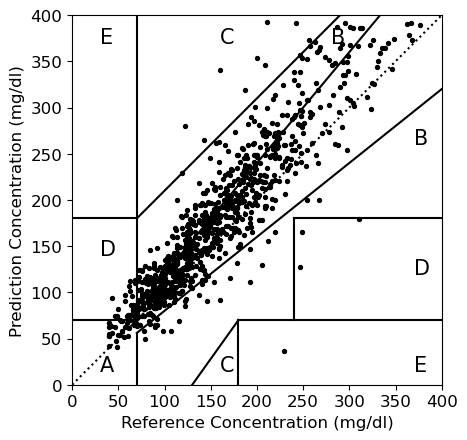

In [71]:
plot, zonefslw1 = clarke_error_grid(dfw1["Fingerprick (mg/dL)"], dfw1["FSL (mg/dL)"], "FSL", "PA", "") #, "Clarke Error Grid -  Fingerprick vs FSL (Exercise)"
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zonefslw1[0], zonefslw1[0]/sum(zonefslw1), zonefslw1[1], zonefslw1[1]/sum(zonefslw1), zonefslw1[2], zonefslw1[2]/sum(zonefslw1), zonefslw1[3], zonefslw1[3]/sum(zonefslw1), zonefslw1[4], zonefslw1[4]/sum(zonefslw1)))

Input Warning: the maximum reference value 421.56503999999995 or the maximum prediction value 459.0 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 685 values in zone A (0.8415233415233415%), 
 120 values in zone B (0.14742014742014742%), 
 1 values in zone C (0.0012285012285012285%), 
 8 values in zone D (0.009828009828009828%), 
 0 values in zone E (0.0%)
There are: 
 685 values in zone A (0.8415233415233415%), 
 120 values in zone B (0.14742014742014742%), 
 1 values in zone C (0.0012285012285012285%), 
 8 values in zone D (0.009828009828009828%), 
 0 values in zone E (0.0%)


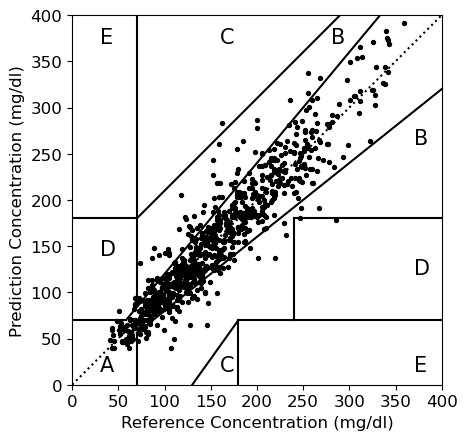

In [72]:
plot, zonefslw2 = clarke_error_grid(dfw2["Fingerprick (mg/dL)"], dfw2["FSL (mg/dL)"],"FSL", "NDA", "") #, "Clarke Error Grid -  Fingerprick vs FSL (NDA)"
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zonefslw2[0], zonefslw2[0]/sum(zonefslw2), zonefslw2[1], zonefslw2[1]/sum(zonefslw2), zonefslw2[2], zonefslw2[2]/sum(zonefslw2), zonefslw2[3], zonefslw2[3]/sum(zonefslw2), zonefslw2[4], zonefslw2[4]/sum(zonefslw2)))

In [73]:
two_proportion_test(zonefslw1[0], zonefslw1[0]/sum(zonefslw1), zonefslw2[0], zonefslw2[0]/sum(zonefslw2), "samples differ")

P-value for the 2 proportion test =  1.2338294757820143e-21
Thus, we reject the null hypothesis (samples differ)


Input Warning: the maximum reference value 500.0 or the maximum prediction value 399.0 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 645 values in zone A (0.710352422907489%), 
 239 values in zone B (0.263215859030837%), 
 4 values in zone C (0.004405286343612335%), 
 17 values in zone D (0.018722466960352423%), 
 3 values in zone E (0.003303964757709251%)


NameError: name 'zoneesw2' is not defined

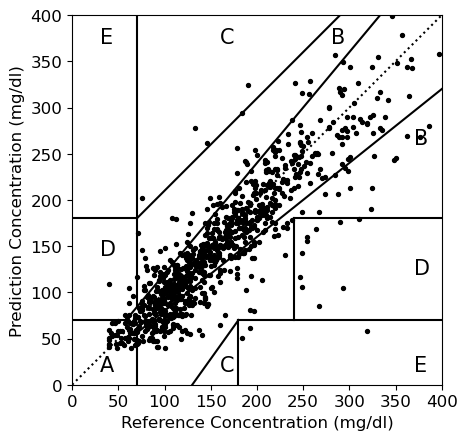

In [74]:
plot, zoneesw1 = clarke_error_grid(dfw1["Fingerprick (mg/dL)"], dfw1["Eversense (mg/dl)"],"ES", "PA", "") #, "Clarke Error Grid -  Fingerprick vs Eversense (NDA)"
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zoneesw2[0], zoneesw2[0]/sum(zoneesw2), zoneesw2[1], zoneesw2[1]/sum(zoneesw2), zoneesw2[2], zoneesw2[2]/sum(zoneesw2), zoneesw2[3], zoneesw2[3]/sum(zoneesw2), zoneesw2[4], zoneesw2[4]/sum(zoneesw2)))

Input Warning: the maximum reference value 421.56503999999995 or the maximum prediction value 372.0 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 663 values in zone A (0.8144963144963145%), 
 135 values in zone B (0.16584766584766586%), 
 0 values in zone C (0.0%), 
 15 values in zone D (0.018427518427518427%), 
 1 values in zone E (0.0012285012285012285%)
There are: 
 663 values in zone A (0.8144963144963145%), 
 135 values in zone B (0.16584766584766586%), 
 0 values in zone C (0.0%), 
 15 values in zone D (0.018427518427518427%), 
 1 values in zone E (0.0012285012285012285%)


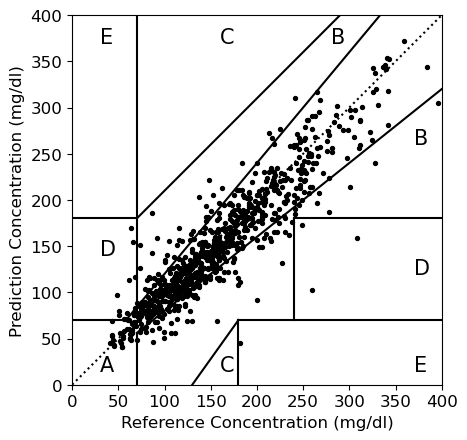

In [75]:
plot, zoneesw2 = clarke_error_grid(dfw2["Fingerprick (mg/dL)"], dfw2["Eversense (mg/dl)"],"ES", "NDA", "") #, "Clarke Error Grid -  Fingerprick vs Eversense (NDA)"
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zoneesw2[0], zoneesw2[0]/sum(zoneesw2), zoneesw2[1], zoneesw2[1]/sum(zoneesw2), zoneesw2[2], zoneesw2[2]/sum(zoneesw2), zoneesw2[3], zoneesw2[3]/sum(zoneesw2), zoneesw2[4], zoneesw2[4]/sum(zoneesw2)))

In [76]:
two_proportion_test(zoneesw1[0], zoneesw1[0]/sum(zoneesw1), zoneesw2[0], zoneesw2[0]/sum(zoneesw2), "samples differ")

P-value for the 2 proportion test =  9.461059683202507e-06
Thus, we reject the null hypothesis (samples differ)


<div class="alert alert-block alert-danger">
    
# **CLARKE ERROR GRID ANALYSIS -- time**

</div>

<div class="alert alert-block alert-warning ">
    
## **CLARKE ERROR GRID ANALYSIS (Morning)**

</div>

Input Warning: the maximum reference value 500.0 or the maximum prediction value 500.0 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 193 values in zone A (0.5676470588235294%), 
 133 values in zone B (0.3911764705882353%), 
 9 values in zone C (0.026470588235294117%), 
 4 values in zone D (0.011764705882352941%), 
 1 values in zone E (0.0029411764705882353%)
There are: 
 193 values in zone A (0.5676470588235294%), 
 133 values in zone B (0.3911764705882353%), 
 9 values in zone C (0.026470588235294117%), 
 4 values in zone D (0.011764705882352941%), 
 1 values in zone E (0.0029411764705882353%)


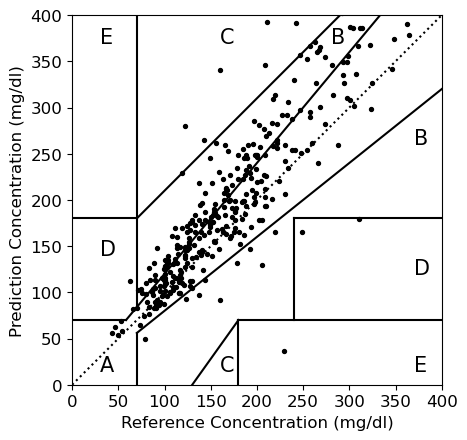

In [77]:
plot, zonefslw1 = clarke_error_grid(list(mañanaw1["Fingerprick (mg/dL)"]), list(mañanaw1["FSL (mg/dL)"]),"FSL", "PA", "") #"Clarke Error Grid -  Fingerprick vs FSL (Morning - Exercise)"
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zonefslw1[0], zonefslw1[0]/sum(zonefslw1), zonefslw1[1], zonefslw1[1]/sum(zonefslw1), zonefslw1[2], zonefslw1[2]/sum(zonefslw1), zonefslw1[3], zonefslw1[3]/sum(zonefslw1), zonefslw1[4], zonefslw1[4]/sum(zonefslw1)))

Input Warning: the maximum reference value 396.34319999999997 or the maximum prediction value 403.54943999999995 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 197 values in zone A (0.8602620087336245%), 
 29 values in zone B (0.12663755458515283%), 
 0 values in zone C (0.0%), 
 3 values in zone D (0.013100436681222707%), 
 0 values in zone E (0.0%)
There are: 
 197 values in zone A (0.8602620087336245%), 
 29 values in zone B (0.12663755458515283%), 
 0 values in zone C (0.0%), 
 3 values in zone D (0.013100436681222707%), 
 0 values in zone E (0.0%)


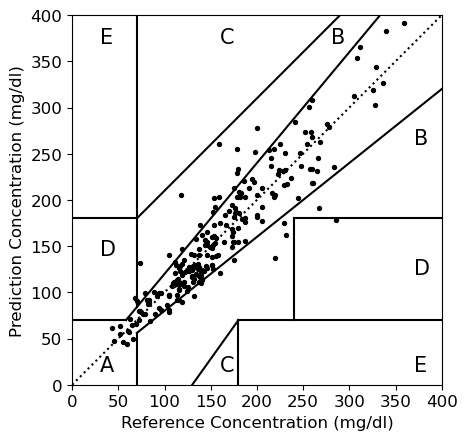

In [78]:
plot, zonefslw2 = clarke_error_grid(list(mañanaw2["Fingerprick (mg/dL)"]), list(mañanaw2["FSL (mg/dL)"]),"FSL", "NDA", "") #"Clarke Error Grid -  Fingerprick vs FSL (Morning - NDA)"
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zonefslw2[0], zonefslw2[0]/sum(zonefslw2), zonefslw2[1], zonefslw2[1]/sum(zonefslw2), zonefslw2[2], zonefslw2[2]/sum(zonefslw2), zonefslw2[3], zonefslw2[3]/sum(zonefslw2), zonefslw2[4], zonefslw2[4]/sum(zonefslw2)))

In [79]:
two_proportion_test(zonefslw1[0], zonefslw1[0]/sum(zonefslw1), zonefslw2[0], zonefslw2[0]/sum(zonefslw2), "samples differ")

P-value for the 2 proportion test =  1.5197261626889902e-10
Thus, we reject the null hypothesis (samples differ)


Input Warning: the maximum reference value 500.0 or the maximum prediction value 399.0 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 243 values in zone A (0.7147058823529412%), 
 91 values in zone B (0.2676470588235294%), 
 1 values in zone C (0.0029411764705882353%), 
 5 values in zone D (0.014705882352941176%), 
 0 values in zone E (0.0%)
There are: 
 243 values in zone A (0.7147058823529412%), 
 91 values in zone B (0.2676470588235294%), 
 1 values in zone C (0.0029411764705882353%), 
 5 values in zone D (0.014705882352941176%), 
 0 values in zone E (0.0%)


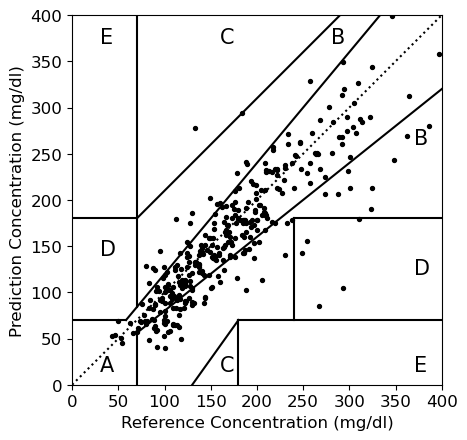

In [80]:
plot, zoneesw1 = clarke_error_grid(list(mañanaw1["Fingerprick (mg/dL)"]), list(mañanaw1["Eversense (mg/dl)"]),"ES", "PA", "") #"Clarke Error Grid -  Fingerprick vs Eversense (Morning - Exercise)"
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zoneesw1[0], zoneesw1[0]/sum(zoneesw1), zoneesw1[1], zoneesw1[1]/sum(zoneesw1), zoneesw1[2], zoneesw1[2]/sum(zoneesw1), zoneesw1[3], zoneesw1[3]/sum(zoneesw1), zoneesw1[4], zoneesw1[4]/sum(zoneesw1)))

There are: 
 189 values in zone A (0.8253275109170306%), 
 34 values in zone B (0.14847161572052403%), 
 0 values in zone C (0.0%), 
 5 values in zone D (0.021834061135371178%), 
 1 values in zone E (0.004366812227074236%)
There are: 
 189 values in zone A (0.8253275109170306%), 
 34 values in zone B (0.14847161572052403%), 
 0 values in zone C (0.0%), 
 5 values in zone D (0.021834061135371178%), 
 1 values in zone E (0.004366812227074236%)


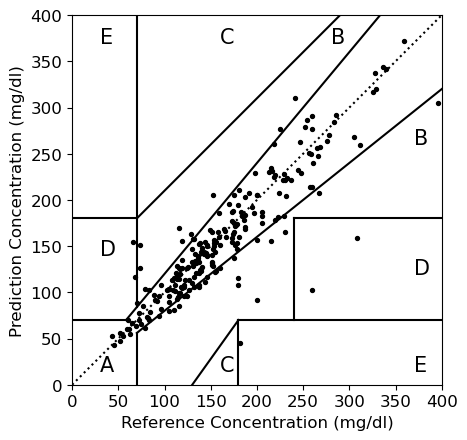

In [81]:
plot, zoneesw2 = clarke_error_grid(list(mañanaw2["Fingerprick (mg/dL)"]), list(mañanaw2["Eversense (mg/dl)"]),"ES", "NDA", "") #"Clarke Error Grid -  Fingerprick vs Eversense (Morning - NDA)"
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zoneesw2[0], zoneesw2[0]/sum(zoneesw2), zoneesw2[1], zoneesw2[1]/sum(zoneesw2), zoneesw2[2], zoneesw2[2]/sum(zoneesw2), zoneesw2[3], zoneesw2[3]/sum(zoneesw2), zoneesw2[4], zoneesw2[4]/sum(zoneesw2)))

In [82]:
two_proportion_test(zoneesw1[0], zoneesw1[0]/sum(zoneesw1), zoneesw2[0], zoneesw2[0]/sum(zoneesw2), "samples differ")

P-value for the 2 proportion test =  0.007304578636947321
Thus, we reject the null hypothesis (samples differ)


<div class="alert alert-block alert-warning ">
    
## **CLARKE ERROR GRID ANALYSIS (Aft)**

</div>

Input Warning: the maximum reference value 408.0 or the maximum prediction value 500.83368 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 182 values in zone A (0.56875%), 
 120 values in zone B (0.375%), 
 3 values in zone C (0.009375%), 
 15 values in zone D (0.046875%), 
 0 values in zone E (0.0%)
There are: 
 182 values in zone A (0.56875%), 
 120 values in zone B (0.375%), 
 3 values in zone C (0.009375%), 
 15 values in zone D (0.046875%), 
 0 values in zone E (0.0%)


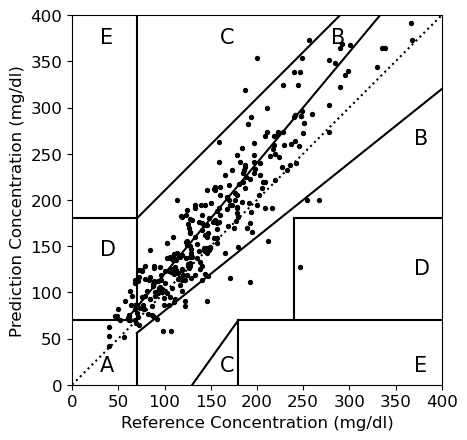

In [83]:
plot, zonefslw1 = clarke_error_grid(list(tardew1["Fingerprick (mg/dL)"]), list(tardew1["FSL (mg/dL)"]),"FSL", "PA","")#, "Clarke Error Grid -  Fingerprick vs FSL (Night - NDA)"
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zonefslw1[0], zonefslw1[0]/sum(zonefslw1), zonefslw1[1], zonefslw1[1]/sum(zonefslw1), zonefslw1[2], zonefslw1[2]/sum(zonefslw1), zonefslw1[3], zonefslw1[3]/sum(zonefslw1), zonefslw1[4], zonefslw1[4]/sum(zonefslw1)))

Input Warning: the maximum reference value 421.56503999999995 or the maximum prediction value 459.0 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 215 values in zone A (0.8333333333333334%), 
 42 values in zone B (0.16279069767441862%), 
 0 values in zone C (0.0%), 
 1 values in zone D (0.003875968992248062%), 
 0 values in zone E (0.0%)
There are: 
 215 values in zone A (0.8333333333333334%), 
 42 values in zone B (0.16279069767441862%), 
 0 values in zone C (0.0%), 
 1 values in zone D (0.003875968992248062%), 
 0 values in zone E (0.0%)


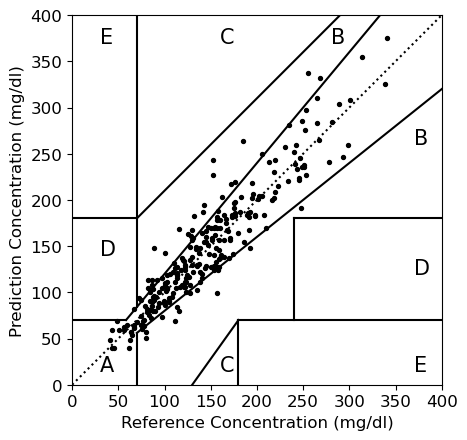

In [84]:
plot, zonefslw2 = clarke_error_grid(list(tardew2["Fingerprick (mg/dL)"]), list(tardew2["FSL (mg/dL)"]),"FSL", "NDA","")#, "Clarke Error Grid -  Fingerprick vs FSL (Afternoon - NDA)"
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zonefslw2[0], zonefslw2[0]/sum(zonefslw2), zonefslw2[1], zonefslw2[1]/sum(zonefslw2), zonefslw2[2], zonefslw2[2]/sum(zonefslw2), zonefslw2[3], zonefslw2[3]/sum(zonefslw2), zonefslw2[4], zonefslw2[4]/sum(zonefslw2)))

In [85]:
two_proportion_test(zonefslw1[0], zonefslw1[0]/sum(zonefslw1), zonefslw2[0], zonefslw2[0]/sum(zonefslw2), "samples differ")

P-value for the 2 proportion test =  6.5919531645710615e-09
Thus, we reject the null hypothesis (samples differ)


Input Warning: the maximum reference value 408.0 or the maximum prediction value 378.32759999999996 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 201 values in zone A (0.628125%), 
 110 values in zone B (0.34375%), 
 2 values in zone C (0.00625%), 
 5 values in zone D (0.015625%), 
 2 values in zone E (0.00625%)
There are: 
 201 values in zone A (0.628125%), 
 110 values in zone B (0.34375%), 
 2 values in zone C (0.00625%), 
 5 values in zone D (0.015625%), 
 2 values in zone E (0.00625%)


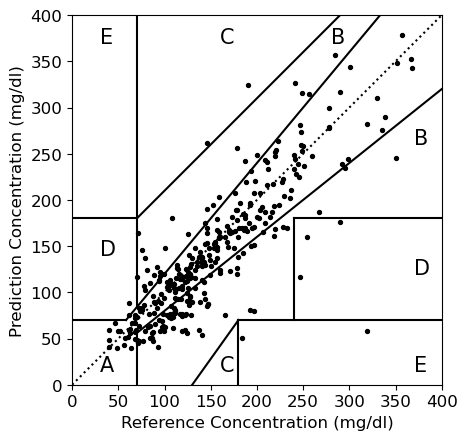

In [86]:
plot, zoneesw1 = clarke_error_grid(list(tardew1["Fingerprick (mg/dL)"]), list(tardew1["Eversense (mg/dl)"]),"ES", "PA", "") #Clarke Error Grid -  Fingerprick vs Eversense (Afternoon - Exercise)
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zoneesw1[0], zoneesw1[0]/sum(zoneesw1), zoneesw1[1], zoneesw1[1]/sum(zoneesw1), zoneesw1[2], zoneesw1[2]/sum(zoneesw1), zoneesw1[3], zoneesw1[3]/sum(zoneesw1), zoneesw1[4], zoneesw1[4]/sum(zoneesw1)))

Input Warning: the maximum reference value 421.56503999999995 or the maximum prediction value 362.11356 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 197 values in zone A (0.7635658914728682%), 
 55 values in zone B (0.2131782945736434%), 
 0 values in zone C (0.0%), 
 6 values in zone D (0.023255813953488372%), 
 0 values in zone E (0.0%)
There are: 
 197 values in zone A (0.7635658914728682%), 
 55 values in zone B (0.2131782945736434%), 
 0 values in zone C (0.0%), 
 6 values in zone D (0.023255813953488372%), 
 0 values in zone E (0.0%)


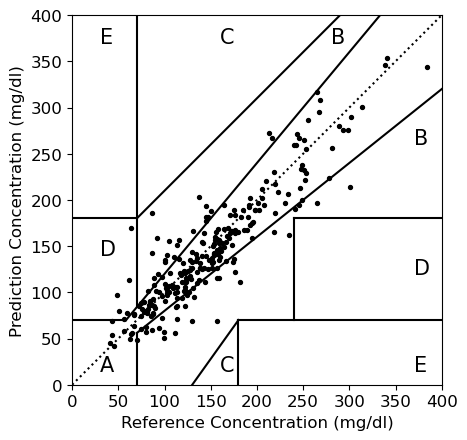

In [87]:
plot, zoneesw2 = clarke_error_grid(list(tardew2["Fingerprick (mg/dL)"]), list(tardew2["Eversense (mg/dl)"]),"ES", "NDA", "") #Clarke Error Grid -  Fingerprick vs Eversense (Afternoon - NDA)
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zoneesw2[0], zoneesw2[0]/sum(zoneesw2), zoneesw2[1], zoneesw2[1]/sum(zoneesw2), zoneesw2[2], zoneesw2[2]/sum(zoneesw2), zoneesw2[3], zoneesw2[3]/sum(zoneesw2), zoneesw2[4], zoneesw2[4]/sum(zoneesw2)))

In [88]:
two_proportion_test(zoneesw1[0], zoneesw1[0]/sum(zoneesw1), zoneesw2[0], zoneesw2[0]/sum(zoneesw2), "samples differ")

P-value for the 2 proportion test =  0.0033387562896120297
Thus, we reject the null hypothesis (samples differ)


<div class="alert alert-block alert-warning ">
    
## **CLARKE ERROR GRID ANALYSIS (Night)**

</div>

Input Warning: the maximum reference value 376.52603999999997 or the maximum prediction value 493.62744 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 144 values in zone A (0.6605504587155964%), 
 67 values in zone B (0.3073394495412844%), 
 0 values in zone C (0.0%), 
 7 values in zone D (0.03211009174311927%), 
 0 values in zone E (0.0%)
There are: 
 144 values in zone A (0.6605504587155964%), 
 67 values in zone B (0.3073394495412844%), 
 0 values in zone C (0.0%), 
 7 values in zone D (0.03211009174311927%), 
 0 values in zone E (0.0%)


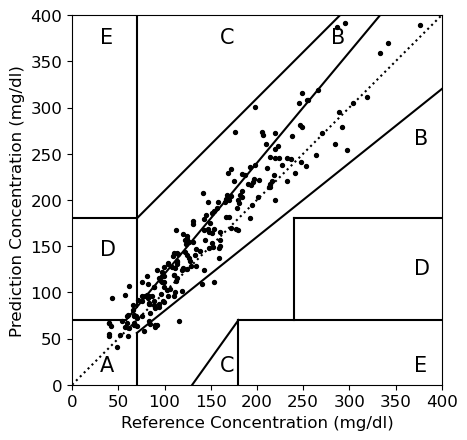

In [89]:
plot, zonefslw1 = clarke_error_grid(list(nochew1["Fingerprick (mg/dL)"]), list(nochew1["FSL (mg/dL)"]),"FSL", "PA", "") #Clarke Error Grid -  Fingerprick vs FSL (Night - exercise)
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zonefslw1[0], zonefslw1[0]/sum(zonefslw1), zonefslw1[1], zonefslw1[1]/sum(zonefslw1), zonefslw1[2], zonefslw1[2]/sum(zonefslw1), zonefslw1[3], zonefslw1[3]/sum(zonefslw1), zonefslw1[4], zonefslw1[4]/sum(zonefslw1)))

Input Warning: the maximum reference value 408.95412 or the maximum prediction value 381.93071999999995 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 220 values in zone A (0.8333333333333334%), 
 40 values in zone B (0.15151515151515152%), 
 1 values in zone C (0.003787878787878788%), 
 3 values in zone D (0.011363636363636364%), 
 0 values in zone E (0.0%)
There are: 
 220 values in zone A (0.8333333333333334%), 
 40 values in zone B (0.15151515151515152%), 
 1 values in zone C (0.003787878787878788%), 
 3 values in zone D (0.011363636363636364%), 
 0 values in zone E (0.0%)


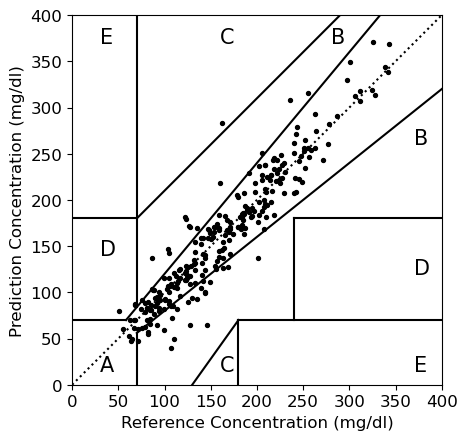

In [90]:
plot, zonefslw2 = clarke_error_grid(list(nochew2["Fingerprick (mg/dL)"]), list(nochew2["FSL (mg/dL)"]),"FSL", "NDA", "") #Clarke Error Grid -  Fingerprick vs FSL (Night - NDA)
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zonefslw2[0], zonefslw2[0]/sum(zonefslw2), zonefslw2[1], zonefslw2[1]/sum(zonefslw2), zonefslw2[2], zonefslw2[2]/sum(zonefslw2), zonefslw2[3], zonefslw2[3]/sum(zonefslw2), zonefslw2[4], zonefslw2[4]/sum(zonefslw2)))

In [91]:
two_proportion_test(zonefslw1[0], zonefslw1[0]/sum(zonefslw1), zonefslw2[0], zonefslw2[0]/sum(zonefslw2), "samples differ")

P-value for the 2 proportion test =  0.00014377227559668444
Thus, we reject the null hypothesis (samples differ)


There are: 
 175 values in zone A (0.8027522935779816%), 
 34 values in zone B (0.1559633027522936%), 
 1 values in zone C (0.0045871559633027525%), 
 7 values in zone D (0.03211009174311927%), 
 1 values in zone E (0.0045871559633027525%)
There are: 
 175 values in zone A (0.8027522935779816%), 
 34 values in zone B (0.1559633027522936%), 
 1 values in zone C (0.0045871559633027525%), 
 7 values in zone D (0.03211009174311927%), 
 1 values in zone E (0.0045871559633027525%)


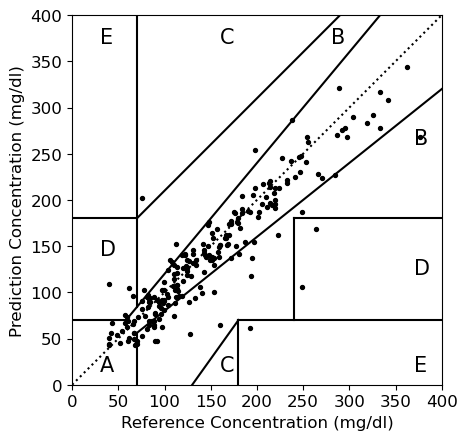

In [92]:
plot, zoneesw1 = clarke_error_grid(list(nochew1["Fingerprick (mg/dL)"]), list(nochew1["Eversense (mg/dl)"]),"ES", "PA", "") #Clarke Error Grid -  Fingerprick vs Eversense (Night - Exercise)
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zoneesw1[0], zoneesw1[0]/sum(zoneesw1), zoneesw1[1], zoneesw1[1]/sum(zoneesw1), zoneesw1[2], zoneesw1[2]/sum(zoneesw1), zoneesw1[3], zoneesw1[3]/sum(zoneesw1), zoneesw1[4], zoneesw1[4]/sum(zoneesw1)))

Input Warning: the maximum reference value 408.95412 or the maximum prediction value 352.0 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 223 values in zone A (0.8446969696969697%), 
 38 values in zone B (0.14393939393939395%), 
 0 values in zone C (0.0%), 
 3 values in zone D (0.011363636363636364%), 
 0 values in zone E (0.0%)
There are: 
 223 values in zone A (0.8446969696969697%), 
 38 values in zone B (0.14393939393939395%), 
 0 values in zone C (0.0%), 
 3 values in zone D (0.011363636363636364%), 
 0 values in zone E (0.0%)


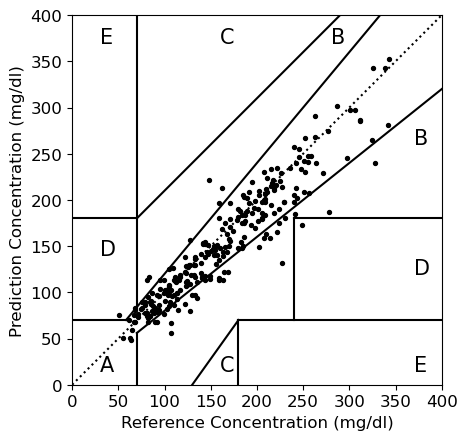

In [93]:
plot, zoneesw2 = clarke_error_grid(list(nochew2["Fingerprick (mg/dL)"]), list(nochew2["Eversense (mg/dl)"]),"ES", "NDA", "") #Clarke Error Grid -  Fingerprick vs Eversense (Night - list()NDA)
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zoneesw2[0], zoneesw2[0]/sum(zoneesw2), zoneesw2[1], zoneesw2[1]/sum(zoneesw2), zoneesw2[2], zoneesw2[2]/sum(zoneesw2), zoneesw2[3], zoneesw2[3]/sum(zoneesw2), zoneesw2[4], zoneesw2[4]/sum(zoneesw2)))

In [94]:
two_proportion_test(zoneesw1[0], zoneesw1[0]/sum(zoneesw1), zoneesw2[0], zoneesw2[0]/sum(zoneesw2), "samples differ")

P-value for the 2 proportion test =  0.27298824278294775
Thus, we FAIL to reject the null hypothesis (no evidence that samples differ)


<div class="alert alert-block alert-warning ">
    
## **CLARKE ERROR GRID ANALYSIS (dawn)**

</div>

There are: 
 25 values in zone A (0.8333333333333334%), 
 5 values in zone B (0.16666666666666666%), 
 0 values in zone C (0.0%), 
 0 values in zone D (0.0%), 
 0 values in zone E (0.0%)
There are: 
 25 values in zone A (0.8333333333333334%), 
 5 values in zone B (0.16666666666666666%), 
 0 values in zone C (0.0%), 
 0 values in zone D (0.0%), 
 0 values in zone E (0.0%)


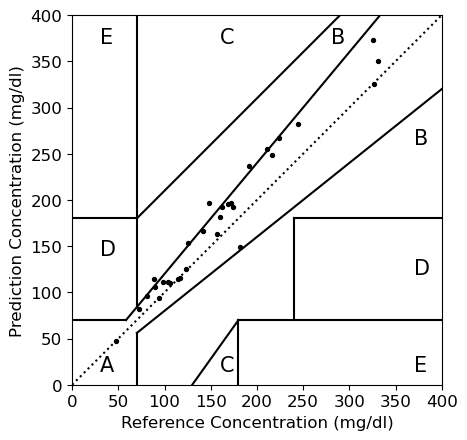

In [95]:
plot, zonefslw1 = clarke_error_grid(list(madrugadaw1["Fingerprick (mg/dL)"]), list(madrugadaw1["FSL (mg/dL)"]),"FSL", "PA", "") #Clarke Error Grid -  Fingerprick vs FSL (Dawn - EXERCISE)
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zonefslw1[0], zonefslw1[0]/sum(zonefslw1), zonefslw1[1], zonefslw1[1]/sum(zonefslw1), zonefslw1[2], zonefslw1[2]/sum(zonefslw1), zonefslw1[3], zonefslw1[3]/sum(zonefslw1), zonefslw1[4], zonefslw1[4]/sum(zonefslw1)))

Input Warning: the maximum reference value 342.0 or the maximum prediction value 408.95412 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 53 values in zone A (0.8412698412698413%), 
 9 values in zone B (0.14285714285714285%), 
 0 values in zone C (0.0%), 
 1 values in zone D (0.015873015873015872%), 
 0 values in zone E (0.0%)
There are: 
 53 values in zone A (0.8412698412698413%), 
 9 values in zone B (0.14285714285714285%), 
 0 values in zone C (0.0%), 
 1 values in zone D (0.015873015873015872%), 
 0 values in zone E (0.0%)


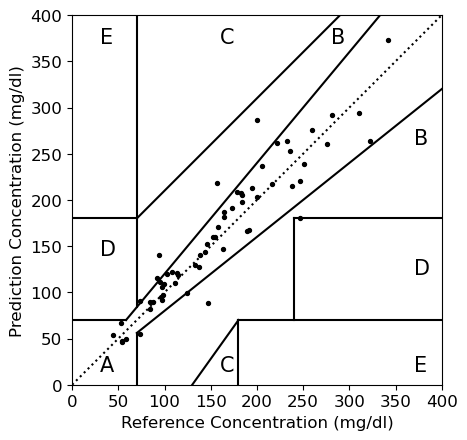

In [96]:
plot, zonefslw2 = clarke_error_grid(list(madrugadaw2["Fingerprick (mg/dL)"]), list(madrugadaw2["FSL (mg/dL)"]),"FSL", "NDA", "") #Clarke Error Grid -  Fingerprick vs FSL (Dawn - NDA)
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zonefslw2[0], zonefslw2[0]/sum(zonefslw2), zonefslw2[1], zonefslw2[1]/sum(zonefslw2), zonefslw2[2], zonefslw2[2]/sum(zonefslw2), zonefslw2[3], zonefslw2[3]/sum(zonefslw2), zonefslw2[4], zonefslw2[4]/sum(zonefslw2)))

In [97]:
two_proportion_test(zonefslw1[0], zonefslw1[0]/sum(zonefslw1), zonefslw2[0], zonefslw2[0]/sum(zonefslw2), "samples differ")

P-value for the 2 proportion test =  0.9291294586554928
Thus, we FAIL to reject the null hypothesis (no evidence that samples differ)


There are: 
 26 values in zone A (0.8666666666666667%), 
 4 values in zone B (0.13333333333333333%), 
 0 values in zone C (0.0%), 
 0 values in zone D (0.0%), 
 0 values in zone E (0.0%)
There are: 
 26 values in zone A (0.8666666666666667%), 
 4 values in zone B (0.13333333333333333%), 
 0 values in zone C (0.0%), 
 0 values in zone D (0.0%), 
 0 values in zone E (0.0%)


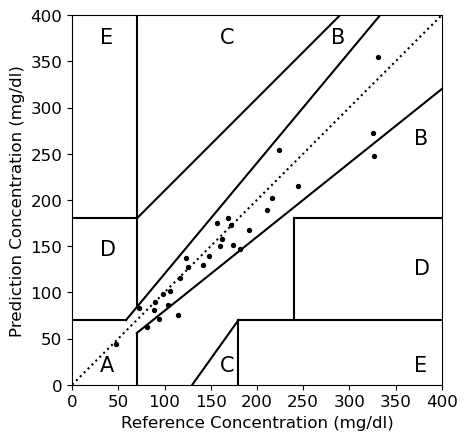

In [98]:
plot, zoneesw1 = clarke_error_grid(list(madrugadaw1["Fingerprick (mg/dL)"]), list(madrugadaw1["Eversense (mg/dl)"]),"ES", "PA", "") #Clarke Error Grid -  Fingerprick vs Eversense (Dawn - Exercise)
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zoneesw1[0], zoneesw1[0]/sum(zoneesw1), zoneesw1[1], zoneesw1[1]/sum(zoneesw1), zoneesw1[2], zoneesw1[2]/sum(zoneesw1), zoneesw1[3], zoneesw1[3]/sum(zoneesw1), zoneesw1[4], zoneesw1[4]/sum(zoneesw1)))

There are: 
 54 values in zone A (0.8571428571428571%), 
 8 values in zone B (0.12698412698412698%), 
 0 values in zone C (0.0%), 
 1 values in zone D (0.015873015873015872%), 
 0 values in zone E (0.0%)
There are: 
 54 values in zone A (0.8571428571428571%), 
 8 values in zone B (0.12698412698412698%), 
 0 values in zone C (0.0%), 
 1 values in zone D (0.015873015873015872%), 
 0 values in zone E (0.0%)


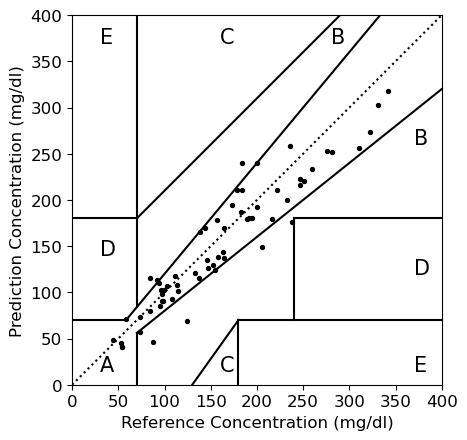

In [99]:
plot, zoneesw2 = clarke_error_grid(list(madrugadaw2["Fingerprick (mg/dL)"]), list(madrugadaw2["Eversense (mg/dl)"]),"FSL", "NDA", "") #Clarke Error Grid -  Fingerprick vs Eversense (Dawn - list(NDA)
print("There are: \n {0} values in zone A ({1}%), \n {2} values in zone B ({3}%), \n {4} values in zone C ({5}%), \n {6} values in zone D ({7}%), \n {8} values in zone E ({9}%)".format(zoneesw2[0], zoneesw2[0]/sum(zoneesw2), zoneesw2[1], zoneesw2[1]/sum(zoneesw2), zoneesw2[2], zoneesw2[2]/sum(zoneesw2), zoneesw2[3], zoneesw2[3]/sum(zoneesw2), zoneesw2[4], zoneesw2[4]/sum(zoneesw2)))

In [100]:
two_proportion_test(zoneesw1[0], zoneesw1[0]/sum(zoneesw1), zoneesw2[0], zoneesw2[0]/sum(zoneesw2), "samples differ")

P-value for the 2 proportion test =  0.9083931230544624
Thus, we FAIL to reject the null hypothesis (no evidence that samples differ)


<div class="alert alert-block alert-warning">
    
# **CLARKE ERROR GRID ANALYSIS -- glucose**

</div>

In [101]:
# FSL
w170_fsl = dfw1[dfw1["FSL (mg/dL)"] <= 70]
w270_fsl = dfw2[dfw2["FSL (mg/dL)"] <= 70]
w1180_fsl = dfw1.loc[(dfw1["FSL (mg/dL)"] <= 180) & (dfw1["FSL (mg/dL)"] > 70)]
w2180_fsl = dfw2.loc[(dfw2["FSL (mg/dL)"] <= 180) & (dfw2["FSL (mg/dL)"] > 70)]
w1max_fsl = dfw1[dfw1["FSL (mg/dL)"] > 180]
w2max_fsl = dfw2[dfw2["FSL (mg/dL)"] > 180]

#Eversense
w170_es = dfw1[dfw1["Eversense (mg/dl)"] <= 70]
w270_es = dfw2[dfw2["Eversense (mg/dl)"] <= 70]
w1180_es = dfw1.loc[(dfw1["Eversense (mg/dl)"] <= 180) & (dfw1["Eversense (mg/dl)"] > 70)]
w2180_es = dfw2.loc[(dfw2["Eversense (mg/dl)"] <= 180) & (dfw2["Eversense (mg/dl)"] > 70)]
w1max_es = dfw1[dfw1["Eversense (mg/dl)"] > 180]
w2max_es = dfw2[dfw2["Eversense (mg/dl)"] > 180]

#Fingerprick
w170_fp = dfw1[dfw1["Fingerprick (mg/dL)"] <= 70]
w270_fp = dfw2[dfw2["Fingerprick (mg/dL)"] <= 70]
w1180_fp = dfw1.loc[(dfw1["Fingerprick (mg/dL)"] <= 180) & (dfw1["Fingerprick (mg/dL)"] > 70)]
w2180_fp = dfw2.loc[(dfw2["Fingerprick (mg/dL)"] <= 180) & (dfw2["Fingerprick (mg/dL)"] > 70)]
w1max_fp = dfw1[dfw1["Fingerprick (mg/dL)"] > 180]
w2max_fp = dfw2[dfw2["Fingerprick (mg/dL)"] > 180]

There are: 
 38 values in zone A (0.6229508196721312%), 
 0 values in zone B (0.0%), 
 0 values in zone C (0.0%), 
 23 values in zone D (0.3770491803278688%), 
 0 values in zone E (0.0%)
There are: 
 43 values in zone A (0.8775510204081632%), 
 0 values in zone B (0.0%), 
 0 values in zone C (0.0%), 
 6 values in zone D (0.12244897959183673%), 
 0 values in zone E (0.0%)


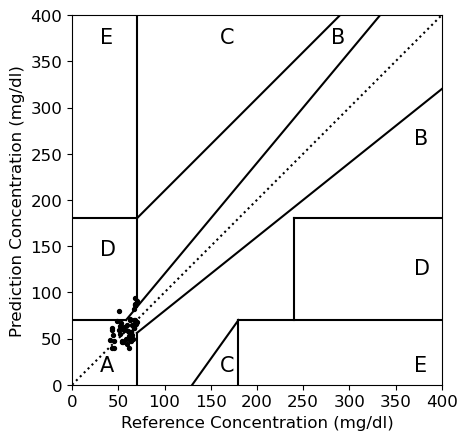

In [102]:
### FSL
plot, zonefslw1hypo = clarke_error_grid(list(w170_fp["Fingerprick (mg/dL)"]), list(w170_fp["FSL (mg/dL)"]),"FSL", "PA", "");
plot, zonefslw2hypo = clarke_error_grid(list(w270_fp["Fingerprick (mg/dL)"]), list(w270_fp["FSL (mg/dL)"]),"FSL", "NDA", "");

In [103]:
two_proportion_test(zonefslw1hypo[0], zonefslw1hypo[0]/sum(zonefslw1hypo), zonefslw2hypo[0], zonefslw2hypo[0]/sum(zonefslw2hypo), "samples differ")

P-value for the 2 proportion test =  0.007577449482019913
Thus, we reject the null hypothesis (samples differ)


There are: 
 328 values in zone A (0.6029411764705882%), 
 213 values in zone B (0.3915441176470588%), 
 3 values in zone C (0.0055147058823529415%), 
 0 values in zone D (0.0%), 
 0 values in zone E (0.0%)
There are: 
 402 values in zone A (0.7976190476190477%), 
 101 values in zone B (0.2003968253968254%), 
 1 values in zone C (0.001984126984126984%), 
 0 values in zone D (0.0%), 
 0 values in zone E (0.0%)


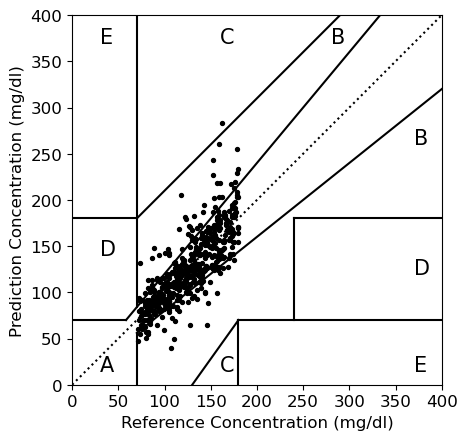

In [104]:
plot, zonefslw1normo = clarke_error_grid(list(w1180_fp["Fingerprick (mg/dL)"]),list( w1180_fp["FSL (mg/dL)"]),"FSL", "PA", "")
plot, zonefslw2normo = clarke_error_grid(list(w2180_fp["Fingerprick (mg/dL)"]),list( w2180_fp["FSL (mg/dL)"]),"FSL", "NDA", "")

In [105]:
two_proportion_test(zonefslw1normo[0], zonefslw1normo[0]/sum(zonefslw1normo), zonefslw2normo[0], zonefslw2normo[0]/sum(zonefslw2normo), "samples differ")

P-value for the 2 proportion test =  8.074412652094926e-09
Thus, we reject the null hypothesis (samples differ)


Input Warning: the maximum reference value 500.0 or the maximum prediction value 500.83368 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 178 values in zone A (0.5874587458745875%), 
 112 values in zone B (0.3696369636963696%), 
 9 values in zone C (0.0297029702970297%), 
 3 values in zone D (0.009900990099009901%), 
 1 values in zone E (0.0033003300330033004%)
Input Warning: the maximum reference value 421.56503999999995 or the maximum prediction value 459.0 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 240 values in zone A (0.9195402298850575%), 
 19 values in zone B (0.07279693486590039%), 
 0 values in zone C (0.0%), 
 2 values in zone D (0.007662835249042145%), 
 0 values in zone E (0.0%)


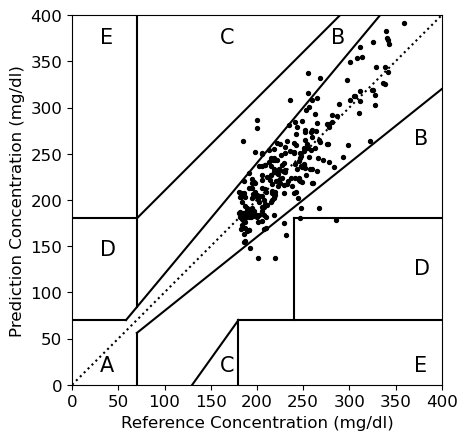

In [106]:
plot, zonefslw1hyper = clarke_error_grid(list(w1max_fp["Fingerprick (mg/dL)"]),list( w1max_fp["FSL (mg/dL)"]),"FSL", "PA", "")
plot, zonefslw2hyper = clarke_error_grid(list(w2max_fp["Fingerprick (mg/dL)"]),list( w2max_fp["FSL (mg/dL)"]),"FSL", "NDA", "")

In [107]:
two_proportion_test(zonefslw1hyper[0], zonefslw1hyper[0]/sum(zonefslw1hyper), zonefslw2hyper[0], zonefslw2hyper[0]/sum(zonefslw2hyper), "samples differ")

P-value for the 2 proportion test =  6.492813518052858e-16
Thus, we reject the null hypothesis (samples differ)


There are: 
 54 values in zone A (0.8852459016393442%), 
 0 values in zone B (0.0%), 
 0 values in zone C (0.0%), 
 7 values in zone D (0.11475409836065574%), 
 0 values in zone E (0.0%)
There are: 
 37 values in zone A (0.7551020408163265%), 
 0 values in zone B (0.0%), 
 0 values in zone C (0.0%), 
 12 values in zone D (0.24489795918367346%), 
 0 values in zone E (0.0%)


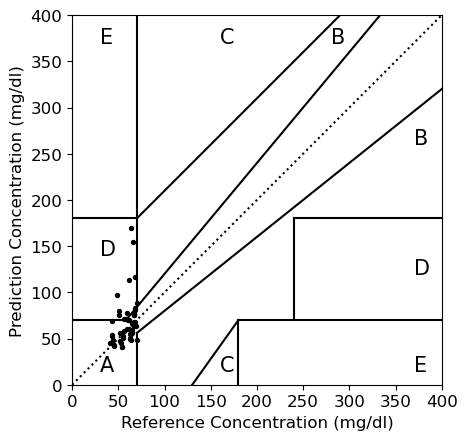

In [108]:
#### EVERSENSE
plot, zoneesw1hypo = clarke_error_grid(list(w170_fp["Fingerprick (mg/dL)"]), list(w170_fp["Eversense (mg/dl)"]),"ES", "PA", "")
plot, zoneesw2hypo = clarke_error_grid(list(w270_fp["Fingerprick (mg/dL)"]), list(w270_fp["Eversense (mg/dl)"]),"ES", "NDA", "")

In [109]:
two_proportion_test(zoneesw1hypo[0], zoneesw1hypo[0]/sum(zoneesw1hypo), zoneesw2hypo[0], zoneesw2hypo[0]/sum(zoneesw2hypo), "samples differ")

P-value for the 2 proportion test =  0.10259606843625485
Thus, we FAIL to reject the null hypothesis (no evidence that samples differ)


There are: 
 361 values in zone A (0.6636029411764706%), 
 180 values in zone B (0.33088235294117646%), 
 3 values in zone C (0.0055147058823529415%), 
 0 values in zone D (0.0%), 
 0 values in zone E (0.0%)
There are: 
 401 values in zone A (0.7956349206349206%), 
 103 values in zone B (0.20436507936507936%), 
 0 values in zone C (0.0%), 
 0 values in zone D (0.0%), 
 0 values in zone E (0.0%)


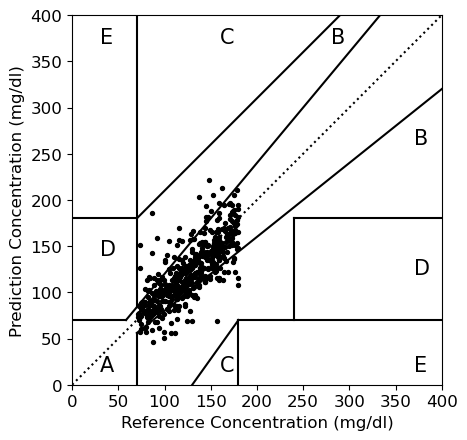

In [110]:
plot, zoneesw1normo = clarke_error_grid(list(w1180_fp["Fingerprick (mg/dL)"]),list( w1180_fp["Eversense (mg/dl)"]),"ES", "PA", "")
plot, zoneesw2normo = clarke_error_grid(list(w2180_fp["Fingerprick (mg/dL)"]),list( w2180_fp["Eversense (mg/dl)"]),"ES", "NDA", "")

In [111]:
two_proportion_test(zoneesw1normo[0], zoneesw1normo[0]/sum(zoneesw1normo), zoneesw2normo[0], zoneesw2normo[0]/sum(zoneesw2normo), "samples differ")

P-value for the 2 proportion test =  3.8887502585538225e-05
Thus, we reject the null hypothesis (samples differ)


Input Warning: the maximum reference value 500.0 or the maximum prediction value 399.0 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 230 values in zone A (0.759075907590759%), 
 59 values in zone B (0.19471947194719472%), 
 1 values in zone C (0.0033003300330033004%), 
 10 values in zone D (0.033003300330033%), 
 3 values in zone E (0.009900990099009901%)
Input Warning: the maximum reference value 421.56503999999995 or the maximum prediction value 372.0 exceeds the normal physiological range of glucose (<400 mg/dl).
There are: 
 225 values in zone A (0.8620689655172413%), 
 32 values in zone B (0.12260536398467432%), 
 0 values in zone C (0.0%), 
 3 values in zone D (0.011494252873563218%), 
 1 values in zone E (0.0038314176245210726%)


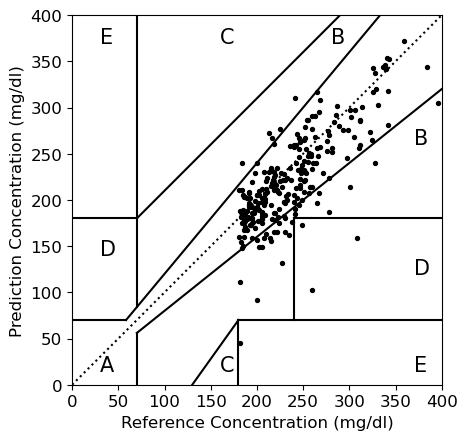

In [112]:
plot, zoneesw1hyper = clarke_error_grid(list(w1max_fp["Fingerprick (mg/dL)"]),list( w1max_fp["Eversense (mg/dl)"]),"ES", "PA", "")
plot, zoneesw2hyper = clarke_error_grid(list(w2max_fp["Fingerprick (mg/dL)"]),list( w2max_fp["Eversense (mg/dl)"]),"ES", "NDA", "")

In [113]:
two_proportion_test(zoneesw1hyper[0], zoneesw1hyper[0]/sum(zoneesw1hyper), zoneesw2hyper[0], zoneesw2hyper[0]/sum(zoneesw2hyper), "samples differ")

P-value for the 2 proportion test =  0.005111708914792669
Thus, we reject the null hypothesis (samples differ)


<div class="alert alert-block alert-danger">
    
# **PA vs NDA**

</div>

<div class="alert alert-block alert-warning">
    
**PA vs NDA -- time**

</div>

In [144]:
madrugadaw1 = dfw1.loc[(dfw1["Datum"] < 6)]
mañanaw1 = dfw1.loc[(dfw1["Datum"] >= 6) & (dfw1["Datum"] < 12)]
tardew1 = dfw1.loc[(dfw1["Datum"] >= 12) & (dfw1["Datum"] < 18)]
nochew1 = dfw1.loc[(dfw1["Datum"] >= 18)]

madrugadaw2 = dfw2.loc[(dfw2["Datum"] < 6)]
mañanaw2 = dfw2.loc[(dfw2["Datum"] >= 6) & (dfw2["Datum"] < 12)]
tardew2 = dfw2.loc[(dfw2["Datum"] >= 12) & (dfw2["Datum"] < 18)]
nochew2 = dfw2.loc[(dfw2["Datum"] >= 18)]

In [145]:
np.random.seed(7)
import random
random.seed(7)

def bootstrap(pop1, pop2, alpha, periodo1, periodo2, week, alternatives):
    n = len(pop1)
    m = len(pop2)
    random.seed(7)
    for e in alternatives:
        
        populationmean = []
        populationmedian = []

        for i in range(0,1000):
            resampledpop1 = choices(pop1[e].values, k = n)
            resampledpop2 = choices(pop2[e].values, k = m)
            populationmean.append(np.mean(resampledpop1) - np.mean(resampledpop2))
            populationmedian.append(np.median(resampledpop1) - np.median(resampledpop2))
        ci_mean = stats.t.interval(alpha=0.95, df=len(populationmean)-1,loc=np.mean(populationmean),scale=stats.sem(populationmean))
        lowermean = ci_mean[0]
        uppermean = ci_mean[1]
        ci_median = stats.t.interval(alpha=0.95, df=len(populationmedian)-1,loc=np.mean(populationmedian),scale=stats.sem(populationmedian))
        lowermedian =ci_median[0]
        uppermedian =ci_median[1]
        print('median' ,lowermedian, uppermedian)
    return [lowermean, uppermean], [lowermedian, uppermedian]

In [146]:
intervalo = 'Morning'
tval, pval = stats.mannwhitneyu(mañanaw1['Fingerprick (mg/dL)'], mañanaw2['Fingerprick (mg/dL)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", intervalo, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", intervalo, "distribution is NOT different between Week1 and Week2")
    
intervalo = 'Afternoon'
tval, pval = stats.mannwhitneyu(tardew1['Fingerprick (mg/dL)'], tardew2['Fingerprick (mg/dL)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", intervalo, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", intervalo, "distribution is NOT different between Week1 and Week2")
    
    
intervalo = 'Evening'
tval, pval = stats.mannwhitneyu(nochew1['Fingerprick (mg/dL)'], nochew2['Fingerprick (mg/dL)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", intervalo, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", intervalo, "distribution is NOT different between Week1 and Week2")
    
    
intervalo = 'Night'
tval, pval = stats.mannwhitneyu(madrugadaw1['Fingerprick (mg/dL)'], madrugadaw2['Fingerprick (mg/dL)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", intervalo, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", intervalo, "distribution is NOT different between Week1 and Week2")

The pvalue is:  0.22856848017023057  so we accept H0: the  Morning distribution is NOT different between Week1 and Week2
The pvalue is:  0.612821938777129  so we accept H0: the  Afternoon distribution is NOT different between Week1 and Week2
The pvalue is:  0.005231373885872498  so we reject H0: the Evening distribution is different between Week1 and Week2
The pvalue is:  0.8856345654468005  so we accept H0: the  Night distribution is NOT different between Week1 and Week2


In [131]:
means_m, medians_m = bootstrap(mañanaw1, mañanaw2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["Fingerprick (mg/dL)"])
means_a, medians_a = bootstrap(tardew1, tardew2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["Fingerprick (mg/dL)"])
means_e, medians_e = bootstrap(nochew1, nochew2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["Fingerprick (mg/dL)"])
means_n, medians_n = bootstrap(madrugadaw1, madrugadaw2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["Fingerprick (mg/dL)"])

dfci_medians = pd.DataFrame() 
dfci_medians['var_name'] = ['$M_{int}$', '$A_{int}$', '$E_{int}$', '$N_{int}$']
dfci_medians['varixable_name'] = ['$M_{int}$', '$A_{int}$', '$E_{int}$', '$N_{int}$']
dfci_medians['ci_upper'] = [medians_m[1],medians_e[1],medians_e[1],medians_n[1]]
dfci_medians['ci_lower'] = [medians_m[0],medians_e[0],medians_e[0],medians_n[0]]
dfci_medians['median'] = [np.mean(medians_m),np.mean(medians_a),np.mean(medians_e),np.mean(medians_n)]
# plot_custom_boxplot_with_ci(dfci_medians,'mediana_t_fp', type_variables='', flag_save_figure=True,flag_save_features=False)

median 9.605981820396433 10.53811277960357
median -0.2624282096493916 0.6123953296493868
median -21.65921885625358 -20.40682262374642
median -7.214802841893388 -4.639599318106606


In [150]:
intervalo = 'Morning'
tval, pval = stats.mannwhitneyu(mañanaw1['FSL (mg/dL)'], mañanaw2['FSL (mg/dL)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", intervalo, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", intervalo, "distribution is NOT different between Week1 and Week2")
    
intervalo = 'Afternoon'
tval, pval = stats.mannwhitneyu(tardew1['FSL (mg/dL)'], tardew2['FSL (mg/dL)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", intervalo, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", intervalo, "distribution is NOT different between Week1 and Week2")
    
    
intervalo = 'Evening'
tval, pval = stats.mannwhitneyu(nochew1['FSL (mg/dL)'], nochew2['FSL (mg/dL)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", intervalo, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", intervalo, "distribution is NOT different between Week1 and Week2")
    
    
intervalo = 'Night'
tval, pval = stats.mannwhitneyu(madrugadaw1['FSL (mg/dL)'], madrugadaw2['FSL (mg/dL)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", intervalo, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", intervalo, "distribution is NOT different between Week1 and Week2")

The pvalue is:  1.0866421720788315e-05  so we reject H0: the Morning distribution is different between Week1 and Week2
The pvalue is:  0.0008957107264459841  so we reject H0: the Afternoon distribution is different between Week1 and Week2
The pvalue is:  0.9751025084448948  so we accept H0: the  Evening distribution is NOT different between Week1 and Week2
The pvalue is:  0.6394408646666625  so we accept H0: the  Night distribution is NOT different between Week1 and Week2


In [155]:
means_m, medians_m = bootstrap(mañanaw1, mañanaw2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["FSL (mg/dL)"])
means_a, medians_a = bootstrap(tardew1, tardew2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["FSL (mg/dL)"])
means_e, medians_e = bootstrap(nochew1, nochew2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["FSL (mg/dL)"])
means_n, medians_n = bootstrap(madrugadaw1, madrugadaw2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["FSL (mg/dL)"])

dfci_medians = pd.DataFrame()
dfci_medians['var_name'] = ['$M_{int}$', '$A_{int}$', '$E_{int}$', '$N_{int}$']
dfci_medians['variable_name'] = ['$M_{int}$', '$A_{int}$', '$E_{int}$', '$N_{int}$']
dfci_medians['ci_upper'] = [medians_m[1],medians_e[1],medians_e[1],medians_n[1]]
dfci_medians['ci_lower'] = [medians_m[0],medians_e[0],medians_e[0],medians_n[0]]
dfci_medians['median'] = [np.mean(medians_m),np.mean(medians_a),np.mean(medians_e),np.mean(medians_n)]
# plot_custom_boxplot_with_ci(dfci_medians,'mediana_t_fsl',type_variables='', flag_save_figure=True,
#                             flag_save_features=False)

median 30.594221779349926 31.682549260650067
median 18.318011069284672 19.50605561071533
median -9.729513453508797 -8.34480022649121
median 4.314249173627713 7.748136906372286


In [152]:
intervalo = 'Morning'
tval, pval = stats.mannwhitneyu(mañanaw1['Eversense (mg/dl)'], mañanaw2['Eversense (mg/dl)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", intervalo, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", intervalo, "distribution is NOT different between Week1 and Week2")
    
intervalo = 'Afternoon'
tval, pval = stats.mannwhitneyu(tardew1['Eversense (mg/dl)'], tardew2['Eversense (mg/dl)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", intervalo, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", intervalo, "distribution is NOT different between Week1 and Week2")
    
    
intervalo = 'Evening'
tval, pval = stats.mannwhitneyu(nochew1['Eversense (mg/dl)'], nochew2['Eversense (mg/dl)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", intervalo, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", intervalo, "distribution is NOT different between Week1 and Week2")
    
    
intervalo = 'Night'
tval, pval = stats.mannwhitneyu(madrugadaw1['Eversense (mg/dl)'], madrugadaw2['Eversense (mg/dl)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", intervalo, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", intervalo, "distribution is NOT different between Week1 and Week2")

The pvalue is:  0.7306671516422449  so we accept H0: the  Morning distribution is NOT different between Week1 and Week2
The pvalue is:  0.2721918709246173  so we accept H0: the  Afternoon distribution is NOT different between Week1 and Week2
The pvalue is:  0.010383461222313822  so we reject H0: the Evening distribution is different between Week1 and Week2
The pvalue is:  0.7361320788305812  so we accept H0: the  Night distribution is NOT different between Week1 and Week2


In [154]:
means_m, medians_m = bootstrap(mañanaw1, mañanaw2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["Eversense (mg/dl)"])
means_a, medians_a = bootstrap(tardew1, tardew2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["Eversense (mg/dl)"])
means_e, medians_e = bootstrap(nochew1, nochew2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["Eversense (mg/dl)"])
means_n, medians_n = bootstrap(madrugadaw1, madrugadaw2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["Eversense (mg/dl)"])

dfci_medians = pd.DataFrame()
dfci_medians['var_name'] = ['$M_{int}$', '$A_{int}$', '$E_{int}$', '$N_{int}$']
dfci_medians['variable_name'] = ['$M_{int}$', '$A_{int}$', '$E_{int}$', '$N_{int}$']
dfci_medians['ci_upper'] = [medians_m[1],medians_e[1],medians_e[1],medians_n[1]]
dfci_medians['ci_lower'] = [medians_m[0],medians_e[0],medians_e[0],medians_n[0]]
dfci_medians['median'] = [np.mean(medians_m),np.mean(medians_a),np.mean(medians_e),np.mean(medians_n)]
# plot_custom_boxplot_with_ci(dfci_medians,'mediana_t_Es', type_variables='', flag_save_figure=True,
#                             flag_save_features=False)

median 2.1912787232446513 3.124874956755354
median -8.031099186747944 -7.2392616132520535
median -13.523173049451659 -12.551913310548345
median -4.35934580553478 -1.5165677944652185


<div class="alert alert-block alert-warning">
    
**PA vs NDA -- glucose**

</div>

In [135]:
#PA
hypo_ref_w1 = dfw1.loc[(dfw1['Fingerprick (mg/dL)'] < 70)]
normo_ref_w1 = dfw1.loc[(dfw1['Fingerprick (mg/dL)'] >= 70) & (dfw1['Fingerprick (mg/dL)'] < 180)]
hyper_ref_w1 = dfw1.loc[(dfw1['Fingerprick (mg/dL)'] >= 180)]

#NDA
hypo_ref_w2 = dfw2.loc[(dfw2['Fingerprick (mg/dL)'] < 70)]
normo_ref_w2 = dfw2.loc[(dfw2['Fingerprick (mg/dL)'] >= 70) & (dfw2['Fingerprick (mg/dL)'] < 180)]
hyper_ref_w2 = dfw2.loc[(dfw2['Fingerprick (mg/dL)'] >= 180)]

rango = 'Hypo'
tval, pval = stats.mannwhitneyu(hypo_ref_w1['Fingerprick (mg/dL)'], hypo_ref_w2['Fingerprick (mg/dL)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", rango, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", rango, "distribution is NOT different between Week1 and Week2")
    
rango = 'Normo'
tval, pval = stats.mannwhitneyu(normo_ref_w1['Fingerprick (mg/dL)'], normo_ref_w2['Fingerprick (mg/dL)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", rango, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", rango, "distribution is NOT different between Week1 and Week2") 
    
rango = 'hyper'
tval, pval = stats.mannwhitneyu(hyper_ref_w1['Fingerprick (mg/dL)'], hyper_ref_w2['Fingerprick (mg/dL)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", rango, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", rango, "distribution is NOT different between Week1 and Week2")

The pvalue is:  0.40760952886956237  so we accept H0: the  Hypo distribution is NOT different between Week1 and Week2
The pvalue is:  0.18153503872209742  so we accept H0: the  Normo distribution is NOT different between Week1 and Week2
The pvalue is:  0.7118643337660653  so we accept H0: the  hyper distribution is NOT different between Week1 and Week2


In [137]:
means_hypo, medians_hypo = bootstrap(hypo_ref_w1, hypo_ref_w2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["Fingerprick (mg/dL)"])
means_hyperu, medians_hyperu = bootstrap(normo_ref_w1, normo_ref_w2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["Fingerprick (mg/dL)"])
means_hyper, medians_hyper = bootstrap(hyper_ref_w1, hyper_ref_w2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["Fingerprick (mg/dL)"])

dfci_hypoedians = pd.DataFrame()
dfci_hypoedians['var_name'] = ['Hypoglycemia', 'Euglycemia', 'Hyperglycemia']
dfci_hypoedians['variable_name'] = ['Hypoglycemia', 'Euglycemia', 'Hyperglycemia']
dfci_hypoedians['ci_upper'] = [medians_hypo[1],medians_hyper[1],medians_hyper[1]]
dfci_hypoedians['ci_lower'] = [medians_hypo[0],medians_hyper[0],medians_hyper[0]]
dfci_hypoedians['median'] = [np.mean(medians_hypo),np.mean(medians_hyperu),np.mean(medians_hyper)]
# plot_custom_boxplot_with_ci(dfci_hypoedians,'mediana_gluc_fp', type_variables='', flag_save_figure=True,
#                             flag_save_features=False)

median -1.6345093688253576 -1.2634897511746408
median -5.054550403706349 -4.684851156293652
median -2.2960214780478148 -1.5823617219521875


In [138]:
#PA
hypo_ref_w1 = dfw1.loc[(dfw1['FSL (mg/dL)'] < 70)]
normo_ref_w1 = dfw1.loc[(dfw1['FSL (mg/dL)'] >= 70) & (dfw1['FSL (mg/dL)'] < 180)]
hyper_ref_w1 = dfw1.loc[(dfw1['FSL (mg/dL)'] >= 180)]

#NDA
hypo_ref_w2 = dfw2.loc[(dfw2['FSL (mg/dL)'] < 70)]
normo_ref_w2 = dfw2.loc[(dfw2['FSL (mg/dL)'] >= 70) & (dfw2['FSL (mg/dL)'] < 180)]
hyper_ref_w2 = dfw2.loc[(dfw2['FSL (mg/dL)'] >= 180)]

rango = 'Hypo'
tval, pval = stats.mannwhitneyu(hypo_ref_w1['FSL (mg/dL)'], hypo_ref_w2['FSL (mg/dL)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", rango, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", rango, "distribution is NOT different between Week1 and Week2")
    
rango = 'Normo'
tval, pval = stats.mannwhitneyu(normo_ref_w1['FSL (mg/dL)'], normo_ref_w2['FSL (mg/dL)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", rango, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", rango, "distribution is NOT different between Week1 and Week2")
    
    
rango = 'hyper'
tval, pval = stats.mannwhitneyu(hyper_ref_w1['FSL (mg/dL)'], hyper_ref_w2['FSL (mg/dL)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", rango, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", rango, "distribution is NOT different between Week1 and Week2")

The pvalue is:  0.10997710178440535  so we accept H0: the  Hypo distribution is NOT different between Week1 and Week2
The pvalue is:  0.36595168522220944  so we accept H0: the  Normo distribution is NOT different between Week1 and Week2
The pvalue is:  6.593415104785862e-05  so we reject H0: the hyper distribution is different between Week1 and Week2


In [139]:
means_hypo, medians_hypo = bootstrap(hypo_ref_w1, hypo_ref_w2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,['FSL (mg/dL)'])
means_hyperu, medians_hyperu = bootstrap(normo_ref_w1, normo_ref_w2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,['FSL (mg/dL)'])
means_hyper, medians_hyper = bootstrap(hyper_ref_w1, hyper_ref_w2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,['FSL (mg/dL)'])

dfci_hypoedians = pd.DataFrame()
dfci_hypoedians['var_name'] = ['Hypoglycemia', 'Euglycemia', 'Hyperglycemia']
dfci_hypoedians['variable_name'] = ['Hypoglycemia', 'Euglycemia', 'Hyperglycemia']
dfci_hypoedians['ci_upper'] = [medians_hypo[1],medians_hyper[1],medians_hyper[1]]
dfci_hypoedians['ci_lower'] = [medians_hypo[0],medians_hyper[0],medians_hyper[0]]
dfci_hypoedians['median'] = [np.mean(medians_hypo),np.mean(medians_hyperu),np.mean(medians_hyper)]
# plot_custom_boxplot_with_ci(dfci_hypoedians, 'mediana_gluc_fsl',type_variables='', flag_save_figure=True,
#                             flag_save_features=False)

median 3.114907364342337 3.4301803956576644
median 1.201977782435154 1.5423581775648436
median 16.67908655156841 17.392117208431593


In [142]:
#PA
hypo_ref_w1 = dfw1.loc[(dfw1['Eversense (mg/dl)'] < 70)]
normo_ref_w1 = dfw1.loc[(dfw1['Eversense (mg/dl)'] >= 70) & (dfw1['Eversense (mg/dl)'] < 180)]
hyper_ref_w1 = dfw1.loc[(dfw1['Eversense (mg/dl)'] >= 180)]

#NDA
hypo_ref_w2 = dfw2.loc[(dfw2['Eversense (mg/dl)'] < 70)]
normo_ref_w2 = dfw2.loc[(dfw2['Eversense (mg/dl)'] >= 70) & (dfw2['Eversense (mg/dl)'] < 180)]
hyper_ref_w2 = dfw2.loc[(dfw2['Eversense (mg/dl)'] >= 180)]

rango = 'Hypo'
tval, pval = stats.mannwhitneyu(hypo_ref_w1['Eversense (mg/dl)'], hypo_ref_w2['Eversense (mg/dl)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", rango, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", rango, "distribution is NOT different between Week1 and Week2")
    
rango = 'Normo'
tval, pval = stats.mannwhitneyu(normo_ref_w1['Eversense (mg/dl)'], normo_ref_w2['Eversense (mg/dl)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", rango, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", rango, "distribution is NOT different between Week1 and Week2")
    
    
rango = 'hyper'
tval, pval = stats.mannwhitneyu(hyper_ref_w1['Eversense (mg/dl)'], hyper_ref_w2['Eversense (mg/dl)'])
if pval < 0.05:
    print("The pvalue is: ", pval, " so we reject H0: the", rango, "distribution is different between Week1 and Week2")
else:
    print("The pvalue is: ", pval, " so we accept H0: the ", rango, "distribution is NOT different between Week1 and Week2")

The pvalue is:  0.7329784562067507  so we accept H0: the  Hypo distribution is NOT different between Week1 and Week2
The pvalue is:  0.8995726886235491  so we accept H0: the  Normo distribution is NOT different between Week1 and Week2
The pvalue is:  0.06668895664203914  so we accept H0: the  hyper distribution is NOT different between Week1 and Week2


In [143]:
means_hypo, medians_hypo = bootstrap(hypo_ref_w1, hypo_ref_w2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,['Eversense (mg/dl)'])
means_hyperu, medians_hyperu = bootstrap(normo_ref_w1, normo_ref_w2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,['Eversense (mg/dl)'])
means_hyper, medians_hyper = bootstrap(hyper_ref_w1, hyper_ref_w2, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,['Eversense (mg/dl)'])

dfci_hypoedians = pd.DataFrame()
dfci_hypoedians['var_name'] = ['Hypoglycemia', 'Euglycemia', 'Hyperglycemia']
dfci_hypoedians['variable_name'] = ['Hypoglycemia', 'Euglycemia', 'Hyperglycemia']
dfci_hypoedians['ci_upper'] = [medians_hypo[1],medians_hyper[1],medians_hyper[1]]
dfci_hypoedians['ci_lower'] = [medians_hypo[0],medians_hyper[0],medians_hyper[0]]
dfci_hypoedians['median'] = [np.mean(medians_hypo),np.mean(medians_hyperu),np.mean(medians_hyper)]
# plot_custom_boxplot_with_ci(dfci_hypoedians,'mediana_gluc_es', type_variables='', flag_save_figure=True,
#                             flag_save_features=False)

median 1.0777195685321204 1.2893230314678823
median 1.2005298467180472 1.608951753281953
median 11.959775220573677 12.64077953942632


<div class="alert alert-block alert-danger">
    
# **Kruskal Wallis**

</div>

In [156]:
dfw1 = pd.read_excel("Week 1.xlsx")
dfw2 = pd.read_excel("Week 2.xlsx")


dfw1['Datum'] = dfw1['Datum'].astype(str)
dfw2['Datum'] = dfw2['Datum'].astype(str)

dfw1.rename(columns={"Fingerprick  (mg/dL)": "Fingerprick (mg/dL)"}, inplace = True)

dfw1['Datum'] = dfw1['Datum'].str[11:13]
dfw2['Datum'] = dfw2['Datum'].str[11:13]
dfw1['Datum'] = dfw1['Datum'].astype(float)
dfw2['Datum'] = dfw2['Datum'].astype(float)

madrugadaw1 = dfw1.loc[(dfw1["Datum"] < 8)]
mañanaw1 = dfw1.loc[(dfw1["Datum"] >= 8) & (dfw1["Datum"] < 16)]
tardew1 = dfw1.loc[(dfw1["Datum"] >= 16)]

madrugadaw2 = dfw2.loc[(dfw2["Datum"] < 8)]
mañanaw2 = dfw2.loc[(dfw2["Datum"] >= 8) & (dfw2["Datum"] < 16)]
tardew2 = dfw2.loc[(dfw2["Datum"] >= 16)]

In [157]:
madrugadaw1 = dfw1.loc[(dfw1["Datum"] < 6)]
mañanaw1 = dfw1.loc[(dfw1["Datum"] >= 6) & (dfw1["Datum"] < 12)]
tardew1 = dfw1.loc[(dfw1["Datum"] >= 12) & (dfw1["Datum"] < 18)]
nochew1 = dfw1.loc[(dfw1["Datum"] >= 18)]
fullw1 = dfw1

madrugadaw2 = dfw2.loc[(dfw2["Datum"] < 6)]
mañanaw2 = dfw2.loc[(dfw2["Datum"] >= 6) & (dfw2["Datum"] < 12)]
tardew2 = dfw2.loc[(dfw2["Datum"] >= 12) & (dfw2["Datum"] < 18)]
nochew2 = dfw2.loc[(dfw2["Datum"] >= 18)]
fullw2 = dfw2

For  Fingerprick (mg/dL) the p value is:  0.00034 so, we reject the null hypothesis, 
 there are differences among the groups


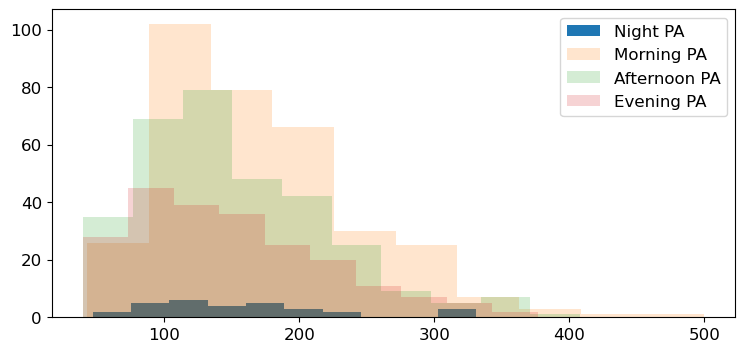

In [158]:
cont = 0
alternatives = ["Fingerprick (mg/dL)"]
for e in alternatives:
    plt.figure(figsize=(30,4))

    a = madrugadaw1[e].values
    b = mañanaw1[e].values
    c = tardew1[e].values
    d = nochew1[e].values
    _, pval = stats.kruskal(madrugadaw1[e].values, mañanaw1[e].values, tardew1[e].values, nochew1[e].values)

    if pval < 0.05:
        print("For ", e, "the p value is: ", np.round(pval,5), "so, we reject the null hypothesis, \n there are differences among the groups")
    else:
        print("For ", e, "the p value is:", np.round(pval,5), "so, we accept the null hypothesis, \n there are no differences among the groups")

    cont += 1
    plt.subplot(1,3,cont)
    plt.hist(a, alpha = 1, label = "Night PA")
    plt.hist(b, alpha = 0.20, label = "Morning PA")
    plt.hist(c, alpha = 0.20, label = "Afternoon PA")
    plt.hist(d, alpha = 0.20, label = "Evening PA")
    plt.legend()
    #plt.title(e + " Week 1")
    plt.show()

### Bootstrapping Week 1

In [319]:
np.random.seed(7)
import random
random.seed(7)

def bootstrap(pop1, pop2, alpha, periodo1, periodo2, week, alternatives):
    n = len(pop1)
    m = len(pop2)
    random.seed(7)
    for e in alternatives:
        
        populationmean = []
        populationmedian = []

        for i in range(0,1000):
            resampledpop1 = choices(pop1[e].values, k = n)
            resampledpop2 = choices(pop2[e].values, k = m)
            populationmean.append(np.mean(resampledpop1) - np.mean(resampledpop2))
            populationmedian.append(np.median(resampledpop1) - np.median(resampledpop2))
        ci_mean = stats.t.interval(alpha=0.95, df=len(populationmean)-1,loc=np.mean(populationmean),scale=stats.sem(populationmean))
        lowermean = ci_mean[0]
        uppermean = ci_mean[1]
        ci_median = stats.t.interval(alpha=0.95, df=len(populationmedian)-1,loc=np.mean(populationmedian),scale=stats.sem(populationmedian))
        lowermedian =ci_median[0]
        uppermedian =ci_median[1]
        print('median' ,lowermedian, uppermedian)
    return [lowermean, uppermean], [lowermedian, uppermedian]

In [159]:
means_nm, medians_nm  =bootstrap(madrugadaw1, mañanaw1, 0.05, "00:00 - 06:00", "06:00 - 12:00",1,["Fingerprick (mg/dL)"])

median -10.98094238044157 -8.801560619558431


In [160]:
means_na, medians_na = bootstrap(madrugadaw1, tardew1, 0.05, "00:00 - 06:00", "12:00 - 18:00",1,["Fingerprick (mg/dL)"])

median 7.111629832646454 9.339795447353552


In [161]:
means_ne, medians_ne = bootstrap(madrugadaw1, nochew1, 0.05, "00:00 - 06:00", "18:00 - 23:59",1,["Fingerprick (mg/dL)"])

median 12.461978083973424 14.716482356026578


In [162]:
means_ma, medians_ma = bootstrap(mañanaw1, tardew1, 0.05, "06:00 - 12:00", "12:00 - 18:00",1,["Fingerprick (mg/dL)"])

median 18.996951984222445 19.91322861577756


In [163]:
means_me, medians_me = bootstrap(mañanaw1, nochew1, 0.05, "06:00 - 12:00", "18:00 - 23:59",1,["Fingerprick (mg/dL)"])

median 24.35516218033071 25.55873585966929


In [164]:
means_ea, medians_ea = bootstrap(tardew1, nochew1, 0.05, "12:00 - 18:00", "18:00 - 23:59",1,["Fingerprick (mg/dL)"])

median 4.419342457032913 5.573126022967083


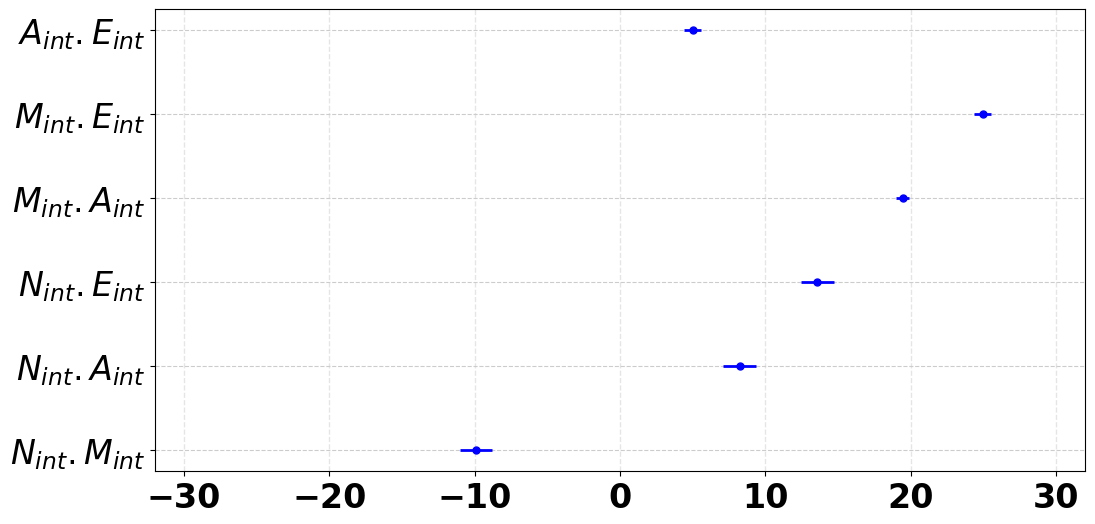

In [326]:
cidf = pd.DataFrame()
cidf['variable_name'] = ['$N_{int}.M_{int}$', '$N_{int}.A_{int}$', '$N_{int}.E_{int}$', '$M_{int}.A_{int}$', '$M_{int}.E_{int}$','$A_{int}.E_{int}$']
cidf['var_name'] = ['$N_{int}.M_{int}', '$N_{int}.A_{int}', '$N_{int}.E_{int}', '$M_{int}.A_{int}', '$M_{int}.E_{int}','$A_{int}.E_{int}']
cidf['ci_upper'] = [medians_nm[1],medians_na[1],medians_ne[1],medians_ma[1],medians_me[1],medians_ea[1]]
cidf['ci_lower'] = [medians_nm[0],medians_na[0],medians_ne[0],medians_ma[0], medians_me[0], medians_ea[0]]
cidf['mean'] = [np.mean(medians_nm),np.mean(medians_na),np.mean(medians_ne),np.mean(medians_ma), np.mean(medians_me), np.mean(medians_ea)]

plot_custom_boxplot_with_ci(cidf, 'KW_partd_medians', type_variables='', flag_save_figure=True,
                            flag_save_features=False)

In [56]:
figure9 = cidf[['variable_name', 'ci_upper', 'ci_lower', 'mean']]

In [57]:
figure9.to_excel('figure_9.xlsx', index= False)

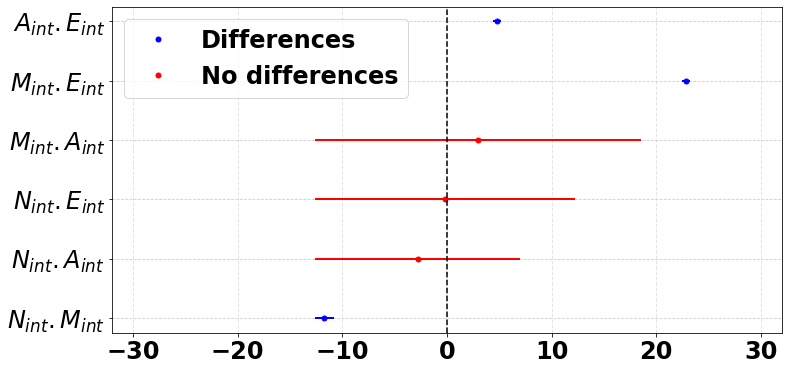

In [23]:
cidf = pd.DataFrame()
cidf['variable_name'] = ['$N_{int}.M_{int}$', '$N_{int}.A_{int}$', '$N_{int}.E_{int}$', '$M_{int}.A_{int}$', '$M_{int}.E_{int}$','$A_{int}.E_{int}$']
cidf['var_name'] = ['$N_{int}.M_{int}', '$N_{int}.A_{int}', '$N_{int}.E_{int}', '$M_{int}.A_{int}', '$M_{int}.E_{int}','$A_{int}.E_{int}']
cidf['ci_upper'] = [means_nm[1],means_na[1],means_ne[1],means_ma[1],means_me[1],means_ea[1]]
cidf['ci_lower'] = [means_nm[0],means_nm[0],means_nm[0],means_nm[0], means_me[0], means_ea[0]]
cidf['mean'] = [np.mean(means_nm),np.mean(means_na),np.mean(means_ne),np.mean(means_ma), np.mean(means_me), np.mean(means_ea)]

plot_custom_boxplot_with_ci(cidf, 'KW_partd_means', type_variables='', flag_save_figure=True,
                            flag_save_features=False)